# A1


████████████████████████████████████████████████████████████
█  TASK A.1: DH PARAMETER TRANSFORMATION VISUALIZER
████████████████████████████████████████████████████████████

TASK A.1: DH PARAMETER TRANSFORMATION

Input Parameters:
  Link Length (a)  : 3 units
  Link Twist (α)   : 90° (1.5708 rad)
  Link Offset (d)  : 2 units
  Joint Angle (θ)  : 60° (1.0472 rad)

Final Transformation Matrix:
  [  0.5000   -0.0000    0.8660    1.5000]
  [  0.8660    0.0000   -0.5000    2.5981]
  [  0.0000    1.0000    0.0000    2.0000]
  [  0.0000    0.0000    0.0000    1.0000]



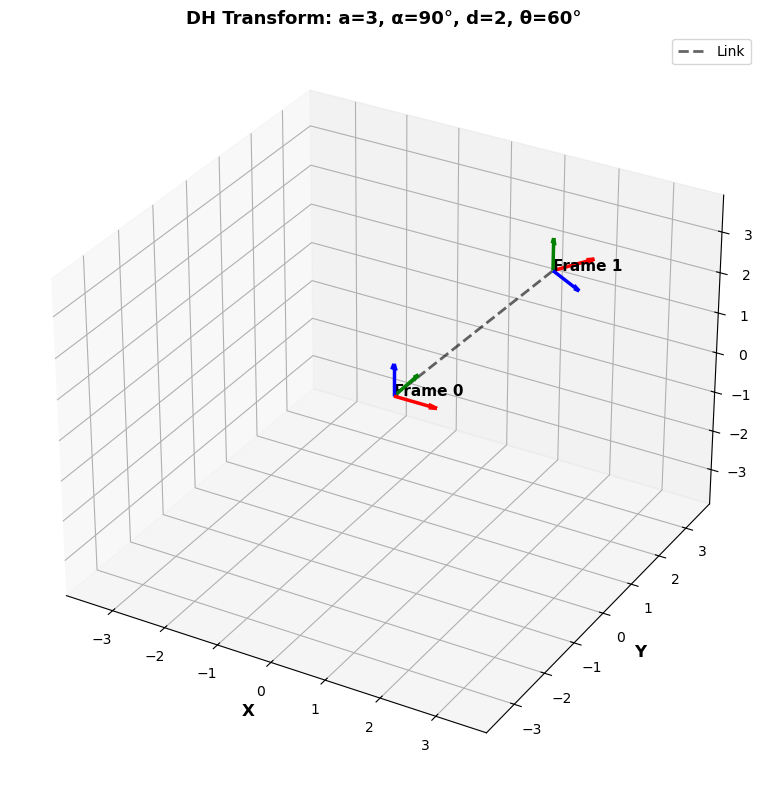

In [11]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class Matrix:
    """Custom Matrix class - implementing all matrix operations from scratch"""
    
    def __init__(self, data):
        self.data = [row[:] for row in data]
        self.rows = len(data)
        self.cols = len(data[0]) if data else 0
    
    def __getitem__(self, idx):
        return self.data[idx]
    
    def __mul__(self, other):
        """Matrix multiplication from scratch"""
        if self.cols != other.rows:
            raise ValueError("Matrix dimensions don't match")
        
        result = [[0 for _ in range(other.cols)] for _ in range(self.rows)]
        for i in range(self.rows):
            for j in range(other.cols):
                for k in range(self.cols):
                    result[i][j] += self.data[i][k] * other.data[k][j]
        
        return Matrix(result)
    
    def __repr__(self):
        s = ""
        for row in self.data:
            s += "  [" + "  ".join(f"{val:8.4f}" for val in row) + "]\n"
        return s


class DHTransform:
    """Denavit-Hartenberg Transformation Calculator"""
    
    @staticmethod
    def rotation_x(alpha):
        """Rotation matrix about X-axis"""
        c = math.cos(alpha)
        s = math.sin(alpha)
        return Matrix([
            [1,  0,  0,  0],
            [0,  c, -s,  0],
            [0,  s,  c,  0],
            [0,  0,  0,  1]
        ])
    
    @staticmethod
    def rotation_z(theta):
        """Rotation matrix about Z-axis"""
        c = math.cos(theta)
        s = math.sin(theta)
        return Matrix([
            [c, -s,  0,  0],
            [s,  c,  0,  0],
            [0,  0,  1,  0],
            [0,  0,  0,  1]
        ])
    
    @staticmethod
    def translation_x(a):
        """Translation matrix along X-axis"""
        return Matrix([
            [1,  0,  0,  a],
            [0,  1,  0,  0],
            [0,  0,  1,  0],
            [0,  0,  0,  1]
        ])
    
    @staticmethod
    def translation_z(d):
        """Translation matrix along Z-axis"""
        return Matrix([
            [1,  0,  0,  0],
            [0,  1,  0,  0],
            [0,  0,  1,  d],
            [0,  0,  0,  1]
        ])
    
    @staticmethod
    def dh_transform(a, alpha, d, theta):
        """
        Complete DH transformation: T = Rz(θ) * Tz(d) * Tx(a) * Rx(α)
        """
        T = DHTransform.rotation_z(theta)
        T = T * DHTransform.translation_z(d)
        T = T * DHTransform.translation_x(a)
        T = T * DHTransform.rotation_x(alpha)
        return T


def visualize_dh_transformation(a, alpha, d, theta):
    """
    Task A.1: Visualize DH transformation between two consecutive frames
    """
    # Convert to radians
    alpha_rad = math.radians(alpha)
    theta_rad = math.radians(theta)
    
    # Compute transformation matrix
    T = DHTransform.dh_transform(a, alpha_rad, d, theta_rad)
    
    print("\n" + "="*60)
    print("TASK A.1: DH PARAMETER TRANSFORMATION")
    print("="*60)
    print(f"\nInput Parameters:")
    print(f"  Link Length (a)  : {a} units")
    print(f"  Link Twist (α)   : {alpha}° ({alpha_rad:.4f} rad)")
    print(f"  Link Offset (d)  : {d} units")
    print(f"  Joint Angle (θ)  : {theta}° ({theta_rad:.4f} rad)")
    
    print(f"\nFinal Transformation Matrix:")
    print(T)
    
    # 3D Visualization
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    def draw_frame(T_matrix, label, scale=0.8):
        """Draw coordinate frame with X(red), Y(green), Z(blue) axes"""
        origin = [T_matrix[0][3], T_matrix[1][3], T_matrix[2][3]]
        
        # X-axis (red)
        x_dir = [T_matrix[0][0], T_matrix[1][0], T_matrix[2][0]]
        ax.quiver(origin[0], origin[1], origin[2], 
                  x_dir[0]*scale, x_dir[1]*scale, x_dir[2]*scale,
                  color='r', arrow_length_ratio=0.2, linewidth=2.5)
        
        # Y-axis (green)
        y_dir = [T_matrix[0][1], T_matrix[1][1], T_matrix[2][1]]
        ax.quiver(origin[0], origin[1], origin[2],
                  y_dir[0]*scale, y_dir[1]*scale, y_dir[2]*scale,
                  color='g', arrow_length_ratio=0.2, linewidth=2.5)
        
        # Z-axis (blue)
        z_dir = [T_matrix[0][2], T_matrix[1][2], T_matrix[2][2]]
        ax.quiver(origin[0], origin[1], origin[2],
                  z_dir[0]*scale, z_dir[1]*scale, z_dir[2]*scale,
                  color='b', arrow_length_ratio=0.2, linewidth=2.5)
        
        ax.text(origin[0], origin[1], origin[2], label, fontsize=11, weight='bold')
    
    # Draw base frame (Frame 0)
    I = Matrix([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
    draw_frame(I, 'Frame 0')
    
    # Draw transformed frame (Frame 1)
    draw_frame(T, 'Frame 1')
    
    # Draw link connection
    ax.plot([0, T[0][3]], [0, T[1][3]], [0, T[2][3]], 
            'k--', linewidth=2, alpha=0.6, label='Link')
    
    ax.set_xlabel('X', fontsize=12, weight='bold')
    ax.set_ylabel('Y', fontsize=12, weight='bold')
    ax.set_zlabel('Z', fontsize=12, weight='bold')
    
    max_range = max(abs(T[0][3]), abs(T[1][3]), abs(T[2][3]), 1.0) * 1.5
    ax.set_xlim([-max_range, max_range])
    ax.set_ylim([-max_range, max_range])
    ax.set_zlim([-max_range, max_range])
    
    ax.set_title(f'DH Transform: a={a}, α={alpha}°, d={d}, θ={theta}°', 
                 fontsize=13, weight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return T


# Task A.1 - Single Example
if __name__ == "__main__":
    print("\n" + "█"*60)
    print("█  TASK A.1: DH PARAMETER TRANSFORMATION VISUALIZER")
    print("█"*60)
    
    T = visualize_dh_transformation(a=3, alpha=90, d=2, theta=60)

# A2

In [14]:
import math
import pybullet as p
import pybullet_data
import time

class Matrix:
    """Custom Matrix class - implementing all matrix operations from scratch"""
    
    def __init__(self, data):
        self.data = [row[:] for row in data]
        self.rows = len(data)
        self.cols = len(data[0]) if data else 0
    
    def __getitem__(self, idx):
        return self.data[idx]
    
    def __mul__(self, other):
        """Matrix multiplication from scratch"""
        if self.cols != other.rows:
            raise ValueError("Matrix dimensions don't match")
        
        result = [[0 for _ in range(other.cols)] for _ in range(self.rows)]
        for i in range(self.rows):
            for j in range(other.cols):
                for k in range(self.cols):
                    result[i][j] += self.data[i][k] * other.data[k][j]
        
        return Matrix(result)
    
    def __repr__(self):
        s = ""
        for row in self.data:
            s += "  [" + "  ".join(f"{val:8.4f}" for val in row) + "]\n"
        return s


class DHTransform:
    """Denavit-Hartenberg Transformation Calculator - ALL FROM SCRATCH"""
    
    @staticmethod
    def rotation_x(alpha):
        c = math.cos(alpha)
        s = math.sin(alpha)
        return Matrix([
            [1,  0,  0,  0],
            [0,  c, -s,  0],
            [0,  s,  c,  0],
            [0,  0,  0,  1]
        ])
    
    @staticmethod
    def rotation_z(theta):
        c = math.cos(theta)
        s = math.sin(theta)
        return Matrix([
            [c, -s,  0,  0],
            [s,  c,  0,  0],
            [0,  0,  1,  0],
            [0,  0,  0,  1]
        ])
    
    @staticmethod
    def translation_x(a):
        return Matrix([
            [1,  0,  0,  a],
            [0,  1,  0,  0],
            [0,  0,  1,  0],
            [0,  0,  0,  1]
        ])
    
    @staticmethod
    def translation_z(d):
        return Matrix([
            [1,  0,  0,  0],
            [0,  1,  0,  0],
            [0,  0,  1,  d],
            [0,  0,  0,  1]
        ])
    
    @staticmethod
    def dh_transform(a, alpha, d, theta):
        """
        Complete DH transformation: T = Rz(θ) * Tz(d) * Tx(a) * Rx(α)
        ALL COMPUTED FROM SCRATCH - NO LIBRARY FUNCTIONS
        """
        T = DHTransform.rotation_z(theta)
        T = T * DHTransform.translation_z(d)
        T = T * DHTransform.translation_x(a)
        T = T * DHTransform.rotation_x(alpha)
        return T


class DHTable:
    """Link Parameter Table for robotic structure"""
    
    def __init__(self):
        self.links = []
    
    def add_link(self, a, alpha, d, theta, joint_type='R'):
        """
        Add a link to the table
        joint_type: 'R' for revolute (θ is variable), 'P' for prismatic (d is variable)
        """
        self.links.append({
            'a': a,
            'alpha': alpha,
            'd': d,
            'theta': theta,
            'joint_type': joint_type
        })
    
    def print_table(self):
        """Print DH parameter table in structured format"""
        print("\n" + "="*70)
        print("LINK PARAMETER TABLE (DH Parameters)")
        print("="*70)
        print(f"{'Link':^6} | {'a':^8} | {'α (deg)':^10} | {'d':^8} | {'θ (deg)':^10} | {'Type':^6}")
        print("-"*70)
        
        for i, link in enumerate(self.links):
            print(f"{i:^6} | {link['a']:^8.3f} | {link['alpha']:^10.3f} | "
                  f"{link['d']:^8.3f} | {link['theta']:^10.3f} | {link['joint_type']:^6}")
        print("="*70)
    
    def get_transformations(self):
        """
        Compute all transformation matrices using OUR DH implementation
        PyBullet is NOT used for computation - only for visualization
        """
        transforms = []
        for link in self.links:
            alpha_rad = math.radians(link['alpha'])
            theta_rad = math.radians(link['theta'])
            T = DHTransform.dh_transform(link['a'], alpha_rad, link['d'], theta_rad)
            transforms.append(T)
        return transforms
    
    def get_cumulative_transforms(self):
        """
        Compute cumulative transformations from base to each frame
        ALL MATRIX MULTIPLICATIONS done with OUR Matrix class
        """
        transforms = self.get_transformations()
        cumulative = [Matrix([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])]  # Base frame
        
        for T in transforms:
            cumulative.append(cumulative[-1] * T)
        
        return cumulative
    
    def update_joint(self, joint_idx, value):
        """Update joint variable (theta for revolute, d for prismatic)"""
        if 0 <= joint_idx < len(self.links):
            if self.links[joint_idx]['joint_type'] == 'R':
                self.links[joint_idx]['theta'] = value
            else:  # Prismatic
                self.links[joint_idx]['d'] = value


def draw_coordinate_frame(position, rotation_matrix, scale=0.3, line_ids=None):
    """
    Draw a coordinate frame at the given position with proper orientation
    Returns the line IDs for updating
    """
    pos = position
    
    # X-axis (red)
    x_end = [
        pos[0] + rotation_matrix[0][0] * scale,
        pos[1] + rotation_matrix[1][0] * scale,
        pos[2] + rotation_matrix[2][0] * scale
    ]
    
    # Y-axis (green)
    y_end = [
        pos[0] + rotation_matrix[0][1] * scale,
        pos[1] + rotation_matrix[1][1] * scale,
        pos[2] + rotation_matrix[2][1] * scale
    ]
    
    # Z-axis (blue)
    z_end = [
        pos[0] + rotation_matrix[0][2] * scale,
        pos[1] + rotation_matrix[1][2] * scale,
        pos[2] + rotation_matrix[2][2] * scale
    ]
    
    if line_ids and len(line_ids) == 3:
        x_id = p.addUserDebugLine(pos, x_end, [1,0,0], lineWidth=4, 
                                   replaceItemUniqueId=line_ids[0])
        y_id = p.addUserDebugLine(pos, y_end, [0,1,0], lineWidth=4,
                                   replaceItemUniqueId=line_ids[1])
        z_id = p.addUserDebugLine(pos, z_end, [0,0,1], lineWidth=4,
                                   replaceItemUniqueId=line_ids[2])
    else:
        x_id = p.addUserDebugLine(pos, x_end, [1,0,0], lineWidth=4)
        y_id = p.addUserDebugLine(pos, y_end, [0,1,0], lineWidth=4)
        z_id = p.addUserDebugLine(pos, z_end, [0,0,1], lineWidth=4)
    
    return [x_id, y_id, z_id]


def draw_link_connection(pos1, pos2, line_id=None):
    """Draw a gray line connecting two coordinate frames"""
    if line_id is not None:
        return p.addUserDebugLine(pos1, pos2, [0.3, 0.3, 0.3], lineWidth=6,
                                 replaceItemUniqueId=line_id)
    else:
        return p.addUserDebugLine(pos1, pos2, [0.3, 0.3, 0.3], lineWidth=6)


def draw_parameter_annotations(dh_table, cumulative_transforms, text_ids=None):
    """
    Draw parameter annotations on each link and joint
    Shows a, alpha, d, theta values
    """
    if text_ids is None:
        text_ids = []
    
    new_text_ids = []
    text_idx = 0
    
    for i, link in enumerate(dh_table.links):
        T_prev = cumulative_transforms[i]
        T_curr = cumulative_transforms[i+1]
        
        # Position for parameter text (midpoint of link)
        mid_x = (T_prev[0][3] + T_curr[0][3]) / 2
        mid_y = (T_prev[1][3] + T_curr[1][3]) / 2
        mid_z = (T_prev[2][3] + T_curr[2][3]) / 2 + 0.3  # Slightly above
        
        # Create parameter text
        param_text = f"Link {i}:\n"
        param_text += f"a={link['a']:.2f}\n"
        param_text += f"α={link['alpha']:.1f}°\n"
        param_text += f"d={link['d']:.2f}\n"
        param_text += f"θ={link['theta']:.1f}°"
        
        if text_idx < len(text_ids):
            tid = p.addUserDebugText(param_text, [mid_x, mid_y, mid_z], 
                                    [0, 0, 0], textSize=0.8,
                                    replaceItemUniqueId=text_ids[text_idx])
        else:
            tid = p.addUserDebugText(param_text, [mid_x, mid_y, mid_z], 
                                    [0, 0, 0], textSize=0.8)
        
        new_text_ids.append(tid)
        text_idx += 1
    
    return new_text_ids


def visualize_robot_pybullet(dh_table, interactive=True):
    """
    Task A.2: Visualize robot structure using PyBullet
    
    Features:
    1. Structured Link Parameter Table
    2. Real-time 3D visualization with coordinate frames
    3. Parameter annotations on each link
    4. Interactive sliders for joint control
    5. Real-time updates of table and visualization
    """
    print("\n" + "="*70)
    print("TASK A.2: ROBOT VISUALIZATION WITH LINK PARAMETER TABLE")
    print("="*70)
    
    # Print the DH table
    dh_table.print_table()
    
    # Print computed transformations
    print("\n" + "="*70)
    print("COMPUTED TRANSFORMATIONS (Using DH Implementation)")
    print("="*70)
    transforms = dh_table.get_transformations()
    cumulative = dh_table.get_cumulative_transforms()
    
    for i, T in enumerate(transforms):
        print(f"\nTransformation Matrix T{i} (Link {i}):")
        print(T)
    
    print(f"\nEnd-Effector Position:")
    final_T = cumulative[-1]
    print(f"  X: {final_T[0][3]:.4f}")
    print(f"  Y: {final_T[1][3]:.4f}")
    print(f"  Z: {final_T[2][3]:.4f}")
    
    # Disconnect any existing PyBullet connection
    try:
        p.disconnect()
    except:
        pass
    
    # Initialize PyBullet
    physicsClient = p.connect(p.GUI)
    p.setAdditionalSearchPath(pybullet_data.getDataPath())
    p.setGravity(0, 0, -9.81)
    
    # Setup camera for better view
    p.resetDebugVisualizerCamera(
        cameraDistance=8.0,
        cameraYaw=45,
        cameraPitch=-20,
        cameraTargetPosition=[2, 0, 1]
    )
    
    # Configure visualizer
    p.configureDebugVisualizer(p.COV_ENABLE_GUI, 1)
    p.configureDebugVisualizer(p.COV_ENABLE_SHADOWS, 1)
    
    # Load ground plane
    planeId = p.loadURDF("plane.urdf")
    
    # Create sliders for interactive control
    sliders = []
    if interactive:
        for i in range(len(dh_table.links)):
            if dh_table.links[i]['joint_type'] == 'R':
                slider = p.addUserDebugParameter(
                    f"Joint {i} θ (deg)", 
                    -180, 180, 
                    dh_table.links[i]['theta']
                )
            else:
                slider = p.addUserDebugParameter(
                    f"Joint {i} d", 
                    -2, 2, 
                    dh_table.links[i]['d']
                )
            sliders.append(slider)
    
    print("\n" + "="*70)
    print("INTERACTIVE VISUALIZATION MODE")
    print("="*70)
    print("Features:")
    print("  • Red/Green/Blue axes show coordinate frames")
    print("  • Gray lines connect coordinate frames (links)")
    print("  • Parameter annotations displayed on each link")
    print("  • Use sliders to adjust joint angles/displacements")
    print("  • Table and visualization update in real-time")
    print("  • Close PyBullet window to exit")
    print("="*70 + "\n")
    
    # Storage for visualization elements
    frame_line_ids = [None] * len(cumulative)
    link_line_ids = [None] * (len(cumulative) - 1)
    frame_label_ids = [None] * len(cumulative)
    param_text_ids = None
    
    try:
        iteration = 0
        while True:
            # Read slider values and update DH table
            if interactive:
                for i, slider in enumerate(sliders):
                    value = p.readUserDebugParameter(slider)
                    dh_table.update_joint(i, value)
            
            # Recompute all transformations
            cumulative = dh_table.get_cumulative_transforms()
            
            # Draw coordinate frames
            for i, T in enumerate(cumulative):
                pos = [T[0][3], T[1][3], T[2][3]]
                
                # Draw coordinate frame axes
                frame_line_ids[i] = draw_coordinate_frame(pos, T.data, scale=0.4, 
                                                          line_ids=frame_line_ids[i])
                
                # Draw frame label
                label_text = f"Frame {i}" if i > 0 else "Base"
                if frame_label_ids[i] is not None:
                    frame_label_ids[i] = p.addUserDebugText(
                        label_text, [pos[0], pos[1], pos[2] - 0.2], 
                        [0, 0, 0], textSize=1.0,
                        replaceItemUniqueId=frame_label_ids[i]
                    )
                else:
                    frame_label_ids[i] = p.addUserDebugText(
                        label_text, [pos[0], pos[1], pos[2] - 0.2], 
                        [0, 0, 0], textSize=1.0
                    )
            
            # Draw links (connections between frames)
            for i in range(len(cumulative) - 1):
                pos1 = [cumulative[i][0][3], cumulative[i][1][3], cumulative[i][2][3]]
                pos2 = [cumulative[i+1][0][3], cumulative[i+1][1][3], cumulative[i+1][2][3]]
                link_line_ids[i] = draw_link_connection(pos1, pos2, link_line_ids[i])
            
            # Draw parameter annotations every 10 iterations (reduce overhead)
            if iteration % 10 == 0:
                param_text_ids = draw_parameter_annotations(dh_table, cumulative, param_text_ids)
            
            # Print current state
            if iteration % 30 == 0:  # Print every 30 frames
                print("\n" + "="*70)
                print("CURRENT ROBOT STATE")
                print("="*70)
                dh_table.print_table()
                final_T = cumulative[-1]
                print(f"\nEnd-Effector Position:")
                print(f"  X: {final_T[0][3]:.4f}")
                print(f"  Y: {final_T[1][3]:.4f}")
                print(f"  Z: {final_T[2][3]:.4f}")
                print("="*70)
            
            p.stepSimulation()
            time.sleep(0.01)
            iteration += 1
            
    except KeyboardInterrupt:
        print("\n\n[Exiting...]")
    except:
        print("\n\n[PyBullet window closed]")
    
    p.disconnect()


# Task A.2 Example
if __name__ == "__main__":
    print("\n" + "█"*70)
    print("█  TASK A.2: LINK PARAMETER TABLE & VISUALIZATION")
    print("█  Building and Visualizing DH Parameters")
    print("█"*70)
    
    # Create a 3-link robot (example: planar 3R manipulator)
    robot = DHTable()
    robot.add_link(a=2.0, alpha=0, d=1.0, theta=0, joint_type='R')
    robot.add_link(a=2.0, alpha=0, d=0.0, theta=45, joint_type='R')
    robot.add_link(a=1.5, alpha=90, d=0.0, theta=30, joint_type='R')
    
    # Visualize with PyBullet (interactive mode)
    visualize_robot_pybullet(robot, interactive=True)


██████████████████████████████████████████████████████████████████████
█  TASK A.2: LINK PARAMETER TABLE & VISUALIZATION
█  Building and Visualizing DH Parameters
██████████████████████████████████████████████████████████████████████

TASK A.2: ROBOT VISUALIZATION WITH LINK PARAMETER TABLE

LINK PARAMETER TABLE (DH Parameters)
 Link  |    a     |  α (deg)   |    d     |  θ (deg)   |  Type 
----------------------------------------------------------------------
  0    |  2.000   |   0.000    |  1.000   |   0.000    |   R   
  1    |  2.000   |   0.000    |  0.000   |   45.000   |   R   
  2    |  1.500   |   90.000   |  0.000   |   30.000   |   R   

COMPUTED TRANSFORMATIONS (Using DH Implementation)

Transformation Matrix T0 (Link 0):
  [  1.0000    0.0000    0.0000    2.0000]
  [  0.0000    1.0000    0.0000    0.0000]
  [  0.0000    0.0000    1.0000    1.0000]
  [  0.0000    0.0000    0.0000    1.0000]


Transformation Matrix T1 (Link 1):
  [  0.7071   -0.7071    0.0000    1.4142]
  [

error: Not connected to physics server.

# A3

In [15]:
import math
import time
import copy
import pybullet as p
import pybullet_data

# ============================================================
#  BASIC MATRIX CLASS (NO NUMPY, FULLY MANUAL)
# ============================================================

class Matrix:
    """Custom Matrix class - all operations done from scratch."""
    
    def __init__(self, data):
        self.data = [row[:] for row in data]
        self.rows = len(data)
        self.cols = len(data[0]) if data else 0
    
    def __getitem__(self, idx):
        return self.data[idx]
    
    def __mul__(self, other):
        """Manual matrix multiplication C = A * B"""
        if self.cols != other.rows:
            raise ValueError("Matrix dimensions don't match for multiplication")
        
        result = [[0.0 for _ in range(other.cols)] for _ in range(self.rows)]
        
        for i in range(self.rows):
            for j in range(other.cols):
                s = 0.0
                for k in range(self.cols):
                    s += self.data[i][k] * other.data[k][j]
                result[i][j] = s
        
        return Matrix(result)
    
    def __repr__(self):
        s = ""
        for row in self.data:
            s += "  [" + "  ".join(f"{val:8.4f}" for val in row) + "]\n"
        return s


# ============================================================
#  DH TRANSFORMATIONS (ALL FROM SCRATCH)
# ============================================================

class DHTransform:
    """Implements basic DH elementary transforms and full DH matrix."""
    
    @staticmethod
    def rotation_z(theta):
        c = math.cos(theta)
        s = math.sin(theta)
        return Matrix([
            [ c, -s, 0, 0],
            [ s,  c, 0, 0],
            [ 0,  0, 1, 0],
            [ 0,  0, 0, 1]
        ])
    
    @staticmethod
    def rotation_x(alpha):
        c = math.cos(alpha)
        s = math.sin(alpha)
        return Matrix([
            [1, 0,  0, 0],
            [0, c, -s, 0],
            [0, s,  c, 0],
            [0, 0,  0, 1]
        ])
    
    @staticmethod
    def translation_z(d):
        return Matrix([
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 1, d],
            [0, 0, 0, 1]
        ])
    
    @staticmethod
    def translation_x(a):
        return Matrix([
            [1, 0, 0, a],
            [0, 1, 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1]
        ])
    
    @staticmethod
    def dh_transform(a, alpha, d, theta):
        """
        Standard Craig DH:
        T = Rz(θ) * Tz(d) * Tx(a) * Rx(α)
        """
        T = DHTransform.rotation_z(theta)
        T = T * DHTransform.translation_z(d)
        T = T * DHTransform.translation_x(a)
        T = T * DHTransform.rotation_x(alpha)
        return T


# ============================================================
#  DH TABLE
# ============================================================

class DHTable:
    """Stores DH parameters and computes link & cumulative transforms."""
    
    def __init__(self):
        self.links = []
    
    def add_link(self, a, alpha_deg, d, theta_deg, joint_type='R'):
        self.links.append({
            'a': a,
            'alpha_deg': alpha_deg,
            'd': d,
            'theta_deg': theta_deg,
            'joint_type': joint_type
        })
    
    def print_table(self):
        print("\n" + "="*70)
        print("LINK PARAMETER TABLE (DH Parameters)")
        print("="*70)
        print(f"{'Link':^6} | {'a':^8} | {'α (deg)':^10} | {'d':^8} | {'θ (deg)':^10} | {'Type':^6}")
        print("-"*70)
        for i, L in enumerate(self.links):
            print(f"{i:^6} | {L['a']:^8.3f} | {L['alpha_deg']:^10.3f} | "
                  f"{L['d']:^8.3f} | {L['theta_deg']:^10.3f} | {L['joint_type']:^6}")
        print("="*70)
    
    def update_joint(self, joint_idx, value):
        if 0 <= joint_idx < len(self.links):
            if self.links[joint_idx]['joint_type'] == 'R':
                self.links[joint_idx]['theta_deg'] = value
            else:
                self.links[joint_idx]['d'] = value


# ============================================================
#  COMPUTE LINK TRANSFORMS (Like your friend's code)
# ============================================================

def compute_link_transforms(dh_table):
    """
    Compute individual link transformation matrices T_i_{i+1}
    (Joint-to-Link connection matrices)
    """
    Ti_list = []
    for link in dh_table.links:
        Ti = DHTransform.dh_transform(
            link['a'],
            math.radians(link['alpha_deg']),
            link['d'],
            math.radians(link['theta_deg'])
        )
        Ti_list.append(Ti)
    return Ti_list


def print_link_transforms(Ti_list):
    """Print individual link transforms"""
    print("\n" + "="*70)
    print("INDIVIDUAL LINK TRANSFORMATION MATRICES  T_{i}→{i+1}")
    print("="*70)
    for i, T in enumerate(Ti_list):
        print(f"\n▶ T{i}_{i+1}  (Frame {i} → Frame {i+1})")
        print(T)


# ============================================================
#  COMPUTE FORWARD FRAMES (Like your friend's code)
# ============================================================

def compute_forward_frames(dh_table):
    """
    Compute cumulative base-to-frame transformations T_0_i
    (Propagation through kinematic chain)
    """
    Ti_list = compute_link_transforms(dh_table)
    
    # Start with identity for base frame
    T_list = [Matrix([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])]
    
    # Propagate: T_0_i = T_0_{i-1} * T_{i-1}_i
    for Ti in Ti_list:
        T_list.append(T_list[-1] * Ti)
    
    return T_list


def print_forward_frames(dh_table):
    """Print cumulative transformations"""
    T_list = compute_forward_frames(dh_table)
    
    print("\n" + "="*70)
    print("CUMULATIVE TRANSFORMATIONS  T0→i  (Base-to-Frame Propagation)")
    print("="*70)
    
    for i, T in enumerate(T_list):
        if i == 0:
            print(f"\n▶ T0_0 = Identity (Base Frame)")
        else:
            print(f"\n▶ T0_{i} = T0_{i-1} × T{i-1}_{i}")
        print(T)
        print(f"    Position: X={T[0][3]:.4f}, Y={T[1][3]:.4f}, Z={T[2][3]:.4f}")
    
    # End-effector
    T_end = T_list[-1]
    print("\n" + "="*70)
    print("END-EFFECTOR TRANSFORMATION (Base → End-Effector)")
    print("="*70)
    print(T_end)
    print(f"\nEnd-effector position: [{T_end[0][3]:.4f}, {T_end[1][3]:.4f}, {T_end[2][3]:.4f}]")


# ============================================================
#  PYBULLET VISUALIZATION - PLOT ALL FRAMES
# ============================================================

def plot_all_frames(dh_table, axis_length=0.4):
    """
    Visualize all coordinate frames (like your friend's matplotlib version)
    """
    try:
        p.disconnect()
    except:
        pass
    
    p.connect(p.GUI)
    p.setAdditionalSearchPath(pybullet_data.getDataPath())
    p.loadURDF("plane.urdf")
    p.setGravity(0, 0, -9.81)
    
    p.resetDebugVisualizerCamera(
        cameraDistance=5.0,
        cameraYaw=45,
        cameraPitch=-30,
        cameraTargetPosition=[1.5, 0, 1.0]
    )
    
    p.configureDebugVisualizer(p.COV_ENABLE_GUI, 1)
    
    print("\n" + "="*70)
    print("VISUALIZATION: All Frames (Static View)")
    print("="*70)
    print("• Shows complete kinematic chain")
    print("• RGB axes at each frame")
    print("• Gray dashed lines connect frames")
    print("="*70 + "\n")
    
    # Compute all frames
    T_list = compute_forward_frames(dh_table)
    
    # Draw base frame
    base_pos = [0, 0, 0]
    p.addUserDebugLine(base_pos, [axis_length, 0, 0], [1, 0, 0], lineWidth=4)
    p.addUserDebugLine(base_pos, [0, axis_length, 0], [0, 1, 0], lineWidth=4)
    p.addUserDebugLine(base_pos, [0, 0, axis_length], [0, 0, 1], lineWidth=4)
    p.addUserDebugText("Base\n(Frame 0)", [0, 0, 0.4], [0, 0, 0], textSize=1.0)
    
    # Draw all link frames
    for i, T in enumerate(T_list[1:], start=1):
        px, py, pz = T[0][3], T[1][3], T[2][3]
        
        # X-axis (red)
        ex = [T[0][0]*axis_length, T[1][0]*axis_length, T[2][0]*axis_length]
        p.addUserDebugLine([px, py, pz], 
                          [px+ex[0], py+ex[1], pz+ex[2]], 
                          [0.7, 0, 0], lineWidth=4)
        
        # Y-axis (green)
        ey = [T[0][1]*axis_length, T[1][1]*axis_length, T[2][1]*axis_length]
        p.addUserDebugLine([px, py, pz],
                          [px+ey[0], py+ey[1], pz+ey[2]],
                          [0, 0.7, 0], lineWidth=4)
        
        # Z-axis (blue)
        ez = [T[0][2]*axis_length, T[1][2]*axis_length, T[2][2]*axis_length]
        p.addUserDebugLine([px, py, pz],
                          [px+ez[0], py+ez[1], pz+ez[2]],
                          [0, 0, 0.7], lineWidth=4)
        
        # Connect to previous frame
        if i == 1:
            p.addUserDebugLine([0, 0, 0], [px, py, pz], [0.4, 0.4, 0.4], lineWidth=3)
        else:
            T_prev = T_list[i-1]
            px_prev, py_prev, pz_prev = T_prev[0][3], T_prev[1][3], T_prev[2][3]
            p.addUserDebugLine([px_prev, py_prev, pz_prev],
                              [px, py, pz],
                              [0.4, 0.4, 0.4], lineWidth=3)
        
        # Frame label
        p.addUserDebugText(f"Frame {i}", [px, py, pz+0.3], [0, 0, 0], textSize=0.9)
    
    print("Static visualization active. Close window to continue...")
    
    try:
        while True:
            p.stepSimulation()
            time.sleep(0.01)
    except KeyboardInterrupt:
        pass
    except:
        pass
    
    p.disconnect()


# ============================================================
#  ANIMATE FULL CHAIN MOTION (Like your friend's code)
# ============================================================

def animate_full_chain_motion(base_dh_table,
                              joint_index=0,
                              theta_min=-60.0,
                              theta_max=60.0,
                              steps=40,
                              axis_length=0.3,
                              pause_time=0.05):
    """
    Animate robot motion by sweeping one joint
    (Adapted from your friend's matplotlib version)
    """
    try:
        p.disconnect()
    except:
        pass
    
    p.connect(p.GUI)
    p.setAdditionalSearchPath(pybullet_data.getDataPath())
    p.loadURDF("plane.urdf")
    p.setGravity(0, 0, -9.81)
    
    p.resetDebugVisualizerCamera(
        cameraDistance=5.0,
        cameraYaw=45,
        cameraPitch=-30,
        cameraTargetPosition=[1.5, 0, 1.0]
    )
    
    p.configureDebugVisualizer(p.COV_ENABLE_GUI, 1)
    
    print("\n" + "="*70)
    print(f"ANIMATION: Joint {joint_index+1} Motion")
    print("="*70)
    print(f"• Sweeping from {theta_min}° to {theta_max}°")
    print(f"• {steps} steps")
    print(f"• Watch how entire chain moves!")
    print("="*70 + "\n")
    
    # Generate angle values
    if steps < 2:
        steps = 2
    delta = (theta_max - theta_min) / (steps - 1)
    theta_values = [theta_min + k * delta for k in range(steps)]
    
    debug_items = []
    
    try:
        for theta in theta_values:
            # Copy DH table and update joint
            dh_table = copy.deepcopy(base_dh_table)
            dh_table.update_joint(joint_index, theta)
            
            # Compute all base-to-frame transforms
            T_list = compute_forward_frames(dh_table)
            
            # Clear previous drawing
            for item in debug_items:
                try:
                    p.removeUserDebugItem(item)
                except:
                    pass
            debug_items = []
            
            # Draw base frame
            debug_items.append(
                p.addUserDebugLine([0,0,0], [axis_length,0,0], [1,0,0], lineWidth=5)
            )
            debug_items.append(
                p.addUserDebugLine([0,0,0], [0,axis_length,0], [0,1,0], lineWidth=5)
            )
            debug_items.append(
                p.addUserDebugLine([0,0,0], [0,0,axis_length], [0,0,1], lineWidth=5)
            )
            
            # Draw all link frames
            for i, T in enumerate(T_list[1:], start=1):
                px, py, pz = T[0][3], T[1][3], T[2][3]
                
                # X-axis
                ex = [T[0][0]*axis_length, T[1][0]*axis_length, T[2][0]*axis_length]
                debug_items.append(
                    p.addUserDebugLine([px,py,pz],
                                      [px+ex[0], py+ex[1], pz+ex[2]],
                                      [0.8,0,0], lineWidth=4)
                )
                
                # Y-axis
                ey = [T[0][1]*axis_length, T[1][1]*axis_length, T[2][1]*axis_length]
                debug_items.append(
                    p.addUserDebugLine([px,py,pz],
                                      [px+ey[0], py+ey[1], pz+ey[2]],
                                      [0,0.8,0], lineWidth=4)
                )
                
                # Z-axis
                ez = [T[0][2]*axis_length, T[1][2]*axis_length, T[2][2]*axis_length]
                debug_items.append(
                    p.addUserDebugLine([px,py,pz],
                                      [px+ez[0], py+ez[1], pz+ez[2]],
                                      [0,0,0.8], lineWidth=4)
                )
                
                # Connect frames
                if i == 1:
                    debug_items.append(
                        p.addUserDebugLine([0,0,0], [px,py,pz],
                                          [0.5,0.5,0.5], lineWidth=4)
                    )
                else:
                    T_prev = T_list[i-1]
                    px_prev = T_prev[0][3]
                    py_prev = T_prev[1][3]
                    pz_prev = T_prev[2][3]
                    debug_items.append(
                        p.addUserDebugLine([px_prev,py_prev,pz_prev],
                                          [px,py,pz],
                                          [0.5,0.5,0.5], lineWidth=4)
                    )
            
            # Title
            debug_items.append(
                p.addUserDebugText(
                    f"Joint {joint_index+1} motion – θ = {theta:.1f}°",
                    [-1.5, -1.5, 2.5],
                    [0, 0, 0],
                    textSize=1.2
                )
            )
            
            # End-effector position
            T_end = T_list[-1]
            ee_text = f"End-Effector:\nX={T_end[0][3]:.3f}\nY={T_end[1][3]:.3f}\nZ={T_end[2][3]:.3f}"
            debug_items.append(
                p.addUserDebugText(ee_text,
                                  [-1.5, -1.5, 2.0],
                                  [0.8, 0, 0],
                                  textSize=0.9)
            )
            
            p.stepSimulation()
            time.sleep(pause_time)
        
        print(f"\nAnimation complete! Joint {joint_index+1} swept from {theta_min}° to {theta_max}°")
        print("Close window to continue...")
        
        # Hold final frame
        while True:
            p.stepSimulation()
            time.sleep(0.01)
            
    except KeyboardInterrupt:
        print("\n[Animation stopped]")
    except:
        print("\n[Window closed]")
    
    p.disconnect()


# ============================================================
#  MAIN - TASK A.3
# ============================================================

def visualize_link_transformations(dh_table):
    """
    TASK A.3: Complete visualization workflow
    """
    print("\n" + "█"*70)
    print("█  TASK A.3: Computing and Visualizing Link Transformation Matrices")
    print("█"*70 + "\n")
    
    # 1. Print DH table
    dh_table.print_table()
    
    # 2. Compute and print individual link transforms
    Ti_list = compute_link_transforms(dh_table)
    print_link_transforms(Ti_list)
    
    # 3. Compute and print forward frames (propagation)
    print_forward_frames(dh_table)
    
    # 4. Static visualization of all frames
    print("\n[Press Ctrl+C in terminal or close window to continue to next visualization]")
    input("Press ENTER to show static frame visualization...")
    plot_all_frames(dh_table)
    
    # 5. Animated motion - Joint 1
    print("\n[Press Ctrl+C in terminal or close window to continue]")
    input("Press ENTER to animate Joint 1...")
    animate_full_chain_motion(
        dh_table,
        joint_index=0,
        theta_min=-60,
        theta_max=60,
        steps=40,
        pause_time=0.05
    )
    
    # 6. Animated motion - Joint 2
    print("\n[Press Ctrl+C in terminal or close window to continue]")
    input("Press ENTER to animate Joint 2...")
    animate_full_chain_motion(
        dh_table,
        joint_index=1,
        theta_min=-60,
        theta_max=60,
        steps=30,
        pause_time=0.05
    )
    
    # 7. Animated motion - Joint 3
    print("\n[Press Ctrl+C in terminal or close window to continue]")
    input("Press ENTER to animate Joint 3...")
    animate_full_chain_motion(
        dh_table,
        joint_index=2,
        theta_min=-60,
        theta_max=60,
        steps=30,
        pause_time=0.05
    )
    
    print("\n" + "="*70)
    print("TASK A.3 Complete! All visualizations finished.")
    print("="*70 + "\n")


# ============================================================
#  EXAMPLE USAGE
# ============================================================

if __name__ == "__main__":
    print("\n" + "█"*70)
    print("█  TASK A.3: Link Transformation Matrix Visualization")
    print("█  (Adapted from your friend's matplotlib approach)")
    print("█"*70 + "\n")
    
    # Create 3-link robot
    robot = DHTable()
    robot.add_link(a=2.0, alpha_deg=0.0,  d=1.0, theta_deg=0.0,  joint_type='R')
    robot.add_link(a=2.0, alpha_deg=0.0,  d=0.0, theta_deg=45.0, joint_type='R')
    robot.add_link(a=1.5, alpha_deg=90.0, d=0.0, theta_deg=30.0, joint_type='R')
    
    # Run complete A.3 visualization
    visualize_link_transformations(robot)


██████████████████████████████████████████████████████████████████████
█  TASK A.3: Link Transformation Matrix Visualization
█  (Adapted from your friend's matplotlib approach)
██████████████████████████████████████████████████████████████████████


██████████████████████████████████████████████████████████████████████
█  TASK A.3: Computing and Visualizing Link Transformation Matrices
██████████████████████████████████████████████████████████████████████


LINK PARAMETER TABLE (DH Parameters)
 Link  |    a     |  α (deg)   |    d     |  θ (deg)   |  Type 
----------------------------------------------------------------------
  0    |  2.000   |   0.000    |  1.000   |   0.000    |   R   
  1    |  2.000   |   0.000    |  0.000   |   45.000   |   R   
  2    |  1.500   |   90.000   |  0.000   |   30.000   |   R   

INDIVIDUAL LINK TRANSFORMATION MATRICES  T_{i}→{i+1}

▶ T0_1  (Frame 0 → Frame 1)
  [  1.0000    0.0000    0.0000    2.0000]
  [  0.0000    1.0000    0.0000    0.0000]
  [ 

error: Not connected to physics server.

In [2]:
import math
import time
import pybullet as p
import pybullet_data

# ============================================================
#  BASIC MATRIX CLASS (NO NUMPY, FULLY MANUAL)
# ============================================================

class Matrix:
    """Custom Matrix class - all operations done from scratch."""
    
    def __init__(self, data):
        self.data = [row[:] for row in data]
        self.rows = len(data)
        self.cols = len(data[0]) if data else 0
    
    def __getitem__(self, idx):
        return self.data[idx]
    
    def __mul__(self, other):
        """Manual matrix multiplication C = A * B"""
        if self.cols != other.rows:
            raise ValueError("Matrix dimensions don't match for multiplication")
        
        result = [[0.0 for _ in range(other.cols)] for _ in range(self.rows)]
        
        for i in range(self.rows):
            for j in range(other.cols):
                s = 0.0
                for k in range(self.cols):
                    s += self.data[i][k] * other.data[k][j]
                result[i][j] = s
        
        return Matrix(result)
    
    def __repr__(self):
        s = ""
        for row in self.data:
            s += "  [" + "  ".join(f"{val:8.4f}" for val in row) + "]\n"
        return s


# ============================================================
#  DH TRANSFORMATIONS (ALL FROM SCRATCH)
# ============================================================

class DHTransform:
    """Implements basic DH elementary transforms and full DH matrix."""
    
    @staticmethod
    def rotation_z(theta):
        c = math.cos(theta)
        s = math.sin(theta)
        return Matrix([
            [ c, -s, 0, 0],
            [ s,  c, 0, 0],
            [ 0,  0, 1, 0],
            [ 0,  0, 0, 1]
        ])
    
    @staticmethod
    def rotation_x(alpha):
        c = math.cos(alpha)
        s = math.sin(alpha)
        return Matrix([
            [1, 0,  0, 0],
            [0, c, -s, 0],
            [0, s,  c, 0],
            [0, 0,  0, 1]
        ])
    
    @staticmethod
    def translation_z(d):
        return Matrix([
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 1, d],
            [0, 0, 0, 1]
        ])
    
    @staticmethod
    def translation_x(a):
        return Matrix([
            [1, 0, 0, a],
            [0, 1, 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1]
        ])
    
    @staticmethod
    def dh_transform(a, alpha, d, theta):
        """
        Standard Craig DH:
        T = Rz(θ) * Tz(d) * Tx(a) * Rx(α)
        All steps use our own Matrix operations.
        """
        T = DHTransform.rotation_z(theta)
        T = T * DHTransform.translation_z(d)
        T = T * DHTransform.translation_x(a)
        T = T * DHTransform.rotation_x(alpha)
        return T


# ============================================================
#  DH TABLE (LINK PARAMETER TABLE)
# ============================================================

class DHTable:
    """Stores DH parameters and computes link & cumulative transforms."""
    
    def __init__(self):
        self.links = []   # each = {a, alpha_deg, d, theta_deg, joint_type}
    
    def add_link(self, a, alpha_deg, d, theta_deg, joint_type='R'):
        """
        joint_type:
          'R' -> revolute (theta is variable)
          'P' -> prismatic (d is variable)
        """
        self.links.append({
            'a': a,
            'alpha_deg': alpha_deg,
            'd': d,
            'theta_deg': theta_deg,
            'joint_type': joint_type
        })
    
    def print_table(self):
        print("\n" + "="*70)
        print("TASK A.3 – LINK PARAMETER TABLE (DH PARAMETERS)")
        print("="*70)
        print(f"{'Link':^6} | {'a':^8} | {'α (deg)':^10} | {'d':^8} | {'θ (deg)':^10} | {'Type':^6}")
        print("-"*70)
        for i, L in enumerate(self.links):
            print(f"{i:^6} | {L['a']:^8.3f} | {L['alpha_deg']:^10.3f} | "
                  f"{L['d']:^8.3f} | {L['theta_deg']:^10.3f} | {L['joint_type']:^6}")
        print("="*70)
    
    def compute_link_transforms(self):
        """
        Compute T_i_{i+1} matrices (joint-to-link transforms) for all links
        using our DHTransform (no PyBullet, no external math libs).
        """
        Ts = []
        for L in self.links:
            a = L['a']
            d = L['d']
            alpha = math.radians(L['alpha_deg'])
            theta = math.radians(L['theta_deg'])
            T = DHTransform.dh_transform(a, alpha, d, theta)
            Ts.append(T)
        return Ts
    
    def compute_cumulative_transforms(self):
        """
        Compute base-to-frame transforms:
          T0_0 = I
          T0_1 = T0_0 * T0_1
          T0_2 = T0_1 * T1_2
          ...
        """
        link_Ts = self.compute_link_transforms()
        cumulative = [Matrix([
            [1,0,0,0],
            [0,1,0,0],
            [0,0,1,0],
            [0,0,0,1]
        ])]  # T0_0 = Identity
        
        for T in link_Ts:
            cumulative.append(cumulative[-1] * T)
        return link_Ts, cumulative
    
    def update_joint(self, joint_idx, value):
        """
        Update joint variable for interactive mode:
          - For revolute: theta_deg
          - For prismatic: d
        """
        if 0 <= joint_idx < len(self.links):
            if self.links[joint_idx]['joint_type'] == 'R':
                self.links[joint_idx]['theta_deg'] = value
            else:
                self.links[joint_idx]['d'] = value


# ============================================================
#  A.3 – COMPUTE & PRINT MATRICES + VISUALIZE WITH PYBULLET
# ============================================================

def visualize_link_transformations(dh_table, animate=True):
    """
    TASK A.3:
      • Compute and display link transformation matrices T_i_{i+1}
      • Show cumulative base-to-frame transforms T0_i
      • Provide animated + interactive visualization of how
        rotations & translations propagate through the chain.
    """
    print("\n" + "#"*70)
    print("# TASK A.3: Computing and Visualizing Link Transformation Matrices")
    print("# (All kinematics computed from scratch – PyBullet ONLY for visualization)")
    print("#"*70)
    
    # 1) Print DH table
    dh_table.print_table()
    
    # 2) Compute T_i_{i+1} and cumulative T0_i
    link_Ts, cumulative = dh_table.compute_cumulative_transforms()
    
    # 3) Print individual link transforms
    print("\n" + "="*70)
    print("INDIVIDUAL LINK TRANSFORMATION MATRICES  T_i→i+1")
    print("="*70)
    for i, T in enumerate(link_Ts):
        print(f"\n▶ T{i}_{i+1}  (Frame {i} → Frame {i+1})")
        print(T)
    
    # 4) Print propagation T0_i
    print("\n" + "="*70)
    print("CUMULATIVE TRANSFORMATIONS  T0→i  (Propagation through chain)")
    print("="*70)
    for i, T in enumerate(cumulative):
        print(f"\n▶ T0_{i}  (Base → Frame {i})")
        print(T)
        print(f"    Position of Frame {i}: "
              f"X={T[0][3]:.4f}, Y={T[1][3]:.4f}, Z={T[2][3]:.4f}")
    
    # 5) End-effector info
    final_T = cumulative[-1]
    print("\n" + "="*70)
    print("END-EFFECTOR (Base → Last Frame)")
    print("="*70)
    print(final_T)
    print(f"\nEnd-Effector Position:"
          f"\n  X = {final_T[0][3]:.4f}"
          f"\n  Y = {final_T[1][3]:.4f}"
          f"\n  Z = {final_T[2][3]:.4f}")
    
    # 6) Visualize with PyBullet
    if animate:
        animate_propagation_pybullet(dh_table)


# ============================================================
#  A.3 – ANIMATED PROPAGATION (PYBULLET)
# ============================================================

def animate_propagation_pybullet(dh_table):
    """
    Animated visualization:
      • Shows frames one-by-one
      • Highlights the newly added frame
      • Draws links between frames
    Then switches to interactive slider mode.
    """
    # (Re)connect PyBullet
    try:
        p.disconnect()
    except:
        pass
    
    p.connect(p.GUI)
    p.setAdditionalSearchPath(pybullet_data.getDataPath())
    p.loadURDF("plane.urdf")
    p.setGravity(0, 0, -9.81)
    
    p.resetDebugVisualizerCamera(
        cameraDistance=5.0,
        cameraYaw=45,
        cameraPitch=-30,
        cameraTargetPosition=[1.5, 0, 1.0]
    )
    
    print("\n[ANIMATION] Showing how T0_i grows step-by-step...")
    
    # Precompute transforms once
    link_Ts, cumulative = dh_table.compute_cumulative_transforms()
    n_frames = len(cumulative)  # includes base
    
    current_step = 0
    last_step_time = time.time()
    step_duration = 2.0  # seconds per step
    
    debug_items = []
    
    try:
        while True:
            now = time.time()
            
            # Step forward in animation
            if now - last_step_time > step_duration:
                current_step += 1
                if current_step >= n_frames:
                    current_step = 0  # loop
                last_step_time = now
            
            # Clear old visuals
            for item in debug_items:
                try:
                    p.removeUserDebugItem(item)
                except:
                    pass
            debug_items = []
            
            # Draw frames up to current_step
            axis_length = 0.4
            for i in range(current_step + 1):
                T = cumulative[i]
                pos = [T[0][3], T[1][3], T[2][3]]
                
                # Highlight newest frame
                if i == current_step:
                    axis_len = axis_length * 1.5
                    lw_axis = 6
                    lw_link = 8
                    fade = 1.0
                else:
                    axis_len = axis_length
                    lw_axis = 3
                    lw_link = 4
                    fade = 0.5
                
                # X-axis (red)
                x_end = [pos[0] + T[0][0]*axis_len,
                         pos[1] + T[1][0]*axis_len,
                         pos[2] + T[2][0]*axis_len]
                debug_items.append(
                    p.addUserDebugLine(pos, x_end, [1*fade, 0, 0], lw_axis)
                )
                
                # Y-axis (green)
                y_end = [pos[0] + T[0][1]*axis_len,
                         pos[1] + T[1][1]*axis_len,
                         pos[2] + T[2][1]*axis_len]
                debug_items.append(
                    p.addUserDebugLine(pos, y_end, [0, 1*fade, 0], lw_axis)
                )
                
                # Z-axis (blue)
                z_end = [pos[0] + T[0][2]*axis_len,
                         pos[1] + T[1][2]*axis_len,
                         pos[2] + T[2][2]*axis_len]
                debug_items.append(
                    p.addUserDebugLine(pos, z_end, [0, 0, 1*fade], lw_axis)
                )
                
                # Link to previous frame
                if i > 0:
                    prev = cumulative[i-1]
                    prev_pos = [prev[0][3], prev[1][3], prev[2][3]]
                    debug_items.append(
                        p.addUserDebugLine(prev_pos, pos,
                                           [0.9, 0.5, 0.1] if i == current_step else [0.4, 0.4, 0.8],
                                           lw_link)
                    )
                
                # Label
                if i == 0:
                    label = "Frame 0\n(Base)"
                else:
                    label = f"Frame {i}\nT0_{i}"
                    if i == current_step:
                        label += "\n(NEW)"
                
                text_pos = [pos[0], pos[1] + 0.2, pos[2] + 0.4]
                text_color = [1, 0, 0] if i == current_step else [0, 0, 0]
                debug_items.append(
                    p.addUserDebugText(label, text_pos, text_color,
                                       textSize=1.4 if i == current_step else 1.0)
                )
            
            # Info text bottom-left
            info_text = f"Step {current_step}/{n_frames-1}: "
            if current_step == 0:
                info_text += "Start from Base Frame (Identity)"
            else:
                info_text += f"Applying T{current_step-1}_{current_step} and forming T0_{current_step}"
            
            debug_items.append(
                p.addUserDebugText(info_text, [-2.0, -2.0, 2.0],
                                   [0, 0, 0], textSize=1.3)
            )
            
            p.stepSimulation()
            time.sleep(0.01)
            
            # After some full cycles you could break to interactive mode;
            # ama burada kullanıcı pencereyi kapatana kadar animasyon dönebilir.
            # İstersen burada tuş dinleme ekleyebilirsin ama proje için şart değil.
    
    except KeyboardInterrupt:
        print("\n[Animation stopped by user]")
    except:
        print("\n[PyBullet window closed or error occurred]")
    
    # Switch to interactive mode if still connected
    if p.isConnected():
        interactive_propagation(dh_table)


# ============================================================
#  A.3 – INTERACTIVE MODE (SLIDERS)
# ============================================================

def interactive_propagation(dh_table):
    """
    Interactive visualization:
      • One slider per joint (θ or d)
      • Recomputes T0_i using OUR kinematics
      • Updates frame axes + link lines + EE position in real time
    """
    print("\n" + "="*70)
    print("INTERACTIVE MODE: Change joint values and see T0_i propagate")
    print("  • Sliders: joint variables (θ for R, d for P)")
    print("  • Frames & links update in real-time using OUR math")
    print("  • PyBullet is only drawing lines and text.")
    print("="*70)
    
    # Create sliders
    sliders = []
    for i, L in enumerate(dh_table.links):
        if L['joint_type'] == 'R':
            sliders.append(
                p.addUserDebugParameter(f"θ{i+1} (deg)", -180, 180, L['theta_deg'])
            )
        else:
            sliders.append(
                p.addUserDebugParameter(f"d{i+1} (m)", -2.0, 2.0, L['d'])
            )
    
    debug_items = []
    
    try:
        while True:
            # Clear previous visuals
            for item in debug_items:
                try:
                    p.removeUserDebugItem(item)
                except:
                    pass
            debug_items = []
            
            # Read sliders and update DH table
            for i, slider in enumerate(sliders):
                value = p.readUserDebugParameter(slider)
                dh_table.update_joint(i, value)
            
            # Recompute transforms with updated joint values
            _, cumulative = dh_table.compute_cumulative_transforms()
            
            axis_length = 0.4
            n_frames = len(cumulative)
            
            for i in range(n_frames):
                T = cumulative[i]
                pos = [T[0][3], T[1][3], T[2][3]]
                
                # Axes
                x_end = [pos[0] + T[0][0]*axis_length,
                         pos[1] + T[1][0]*axis_length,
                         pos[2] + T[2][0]*axis_length]
                y_end = [pos[0] + T[0][1]*axis_length,
                         pos[1] + T[1][1]*axis_length,
                         pos[2] + T[2][1]*axis_length]
                z_end = [pos[0] + T[0][2]*axis_length,
                         pos[1] + T[1][2]*axis_length,
                         pos[2] + T[2][2]*axis_length]
                
                debug_items.append(
                    p.addUserDebugLine(pos, x_end, [1,0,0], 5)
                )
                debug_items.append(
                    p.addUserDebugLine(pos, y_end, [0,1,0], 5)
                )
                debug_items.append(
                    p.addUserDebugLine(pos, z_end, [0,0,1], 5)
                )
                
                # Links
                if i > 0:
                    prev = cumulative[i-1]
                    prev_pos = [prev[0][3], prev[1][3], prev[2][3]]
                    debug_items.append(
                        p.addUserDebugLine(prev_pos, pos, [0.2, 0.5, 0.9], 7)
                    )
                
                # Labels
                label = "Base (0)" if i == 0 else f"Frame {i}"
                label_pos = [pos[0], pos[1] + 0.2, pos[2] + 0.4]
                debug_items.append(
                    p.addUserDebugText(label, label_pos, [0,0,0], textSize=1.2)
                )
            
            # End-effector info
            ee = cumulative[-1]
            info_text = (f"End-Effector (Base → Last Frame)\n"
                         f"X = {ee[0][3]:.3f}\n"
                         f"Y = {ee[1][3]:.3f}\n"
                         f"Z = {ee[2][3]:.3f}")
            debug_items.append(
                p.addUserDebugText(info_text, [-2.0, -2.0, 2.0],
                                   [0,0,0], textSize=1.4)
            )
            
            p.stepSimulation()
            time.sleep(0.02)
    
    except KeyboardInterrupt:
        print("\n[Interactive mode stopped by user]")
    except:
        print("\n[PyBullet window closed]")
    
    if p.isConnected():
        p.disconnect()


# ============================================================
#  TASK A.3 – EXAMPLE RUN
# ============================================================

if __name__ == "__main__":
    print("\n" + "█"*70)
    print("█  TASK A.3: Computing and Visualizing Link Transformation Matrices")
    print("█  (Kinematics: OUR manual math | Visualization: PyBullet only)")
    print("█"*70)
    
    # Example 3-link robot (you can match this to your A.2 table)
    robot = DHTable()
    robot.add_link(a=2.0, alpha_deg=0.0,  d=1.0, theta_deg=0.0,  joint_type='R')
    robot.add_link(a=2.0, alpha_deg=0.0,  d=0.0, theta_deg=45.0, joint_type='R')
    robot.add_link(a=1.5, alpha_deg=90.0, d=0.0, theta_deg=30.0, joint_type='R')
    
    visualize_link_transformations(robot, animate=True)



██████████████████████████████████████████████████████████████████████
█  TASK A.3: Computing and Visualizing Link Transformation Matrices
█  (Kinematics: OUR manual math | Visualization: PyBullet only)
██████████████████████████████████████████████████████████████████████

######################################################################
# TASK A.3: Computing and Visualizing Link Transformation Matrices
# (All kinematics computed from scratch – PyBullet ONLY for visualization)
######################################################################

TASK A.3 – LINK PARAMETER TABLE (DH PARAMETERS)
 Link  |    a     |  α (deg)   |    d     |  θ (deg)   |  Type 
----------------------------------------------------------------------
  0    |  2.000   |   0.000    |  1.000   |   0.000    |   R   
  1    |  2.000   |   0.000    |  0.000   |   45.000   |   R   
  2    |  1.500   |   90.000   |  0.000   |   30.000   |   R   

INDIVIDUAL LINK TRANSFORMATION MATRICES  T_i→i+1

▶ T0_1  (Fram

# A4

In [16]:
import math
import time
import pybullet as p
import pybullet_data

# ============================================================
# MATRIX CLASS - NO NUMPY (ALL FROM SCRATCH)
# ============================================================

class Matrix:
    """4x4 homogeneous transformation matrix implementation"""
    
    def __init__(self, data):
        self.data = [row[:] for row in data]
        self.rows = len(data)
        self.cols = len(data[0]) if data else 0
    
    def __getitem__(self, idx):
        return self.data[idx]
    
    def __mul__(self, other):
        """Matrix multiplication C = A * B"""
        if self.cols != other.rows:
            raise ValueError(f"Cannot multiply {self.rows}x{self.cols} with {other.rows}x{other.cols}")
        
        result = [[0.0 for _ in range(other.cols)] for _ in range(self.rows)]
        
        for i in range(self.rows):
            for j in range(other.cols):
                s = 0.0
                for k in range(self.cols):
                    s += self.data[i][k] * other.data[k][j]
                result[i][j] = s
        
        return Matrix(result)
    
    def __repr__(self):
        s = ""
        for row in self.data:
            s += "  [" + "  ".join(f"{val:8.4f}" for val in row) + "]\n"
        return s
    
    @staticmethod
    def identity():
        return Matrix([
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1]
        ])


# ============================================================
# DH TRANSFORMATION (CRAIG'S MODIFIED DH)
# ============================================================

class DHTransform:
    """
    Denavit-Hartenberg transformation calculator
    Modified DH (Craig): T = Rz(θ) * Tz(d) * Tx(a) * Rx(α)
    """
    
    @staticmethod
    def Rz(theta):
        """Rotation about Z-axis"""
        c = math.cos(theta)
        s = math.sin(theta)
        return Matrix([
            [c, -s, 0, 0],
            [s,  c, 0, 0],
            [0,  0, 1, 0],
            [0,  0, 0, 1]
        ])
    
    @staticmethod
    def Tz(d):
        """Translation along Z-axis"""
        return Matrix([
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 1, d],
            [0, 0, 0, 1]
        ])
    
    @staticmethod
    def Tx(a):
        """Translation along X-axis"""
        return Matrix([
            [1, 0, 0, a],
            [0, 1, 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1]
        ])
    
    @staticmethod
    def Rx(alpha):
        """Rotation about X-axis"""
        c = math.cos(alpha)
        s = math.sin(alpha)
        return Matrix([
            [1,  0,  0, 0],
            [0,  c, -s, 0],
            [0,  s,  c, 0],
            [0,  0,  0, 1]
        ])
    
    @staticmethod
    def compute(a, alpha, d, theta):
        """
        Full DH transformation: T = Rz(θ) * Tz(d) * Tx(a) * Rx(α)
        All angles in RADIANS
        """
        T = DHTransform.Rz(theta)
        T = T * DHTransform.Tz(d)
        T = T * DHTransform.Tx(a)
        T = T * DHTransform.Rx(alpha)
        return T


# ============================================================
# DH PARAMETER TABLE
# ============================================================

class DHTable:
    """Stores DH parameters and computes forward kinematics"""
    
    def __init__(self, name="Robot"):
        self.name = name
        self.links = []
    
    def add_link(self, a, alpha_deg, d, theta_deg, joint_type='R'):
        """
        Add a link to the kinematic chain
        a: link length (m)
        alpha_deg: link twist (degrees)
        d: link offset (m)
        theta_deg: joint angle (degrees)
        joint_type: 'R' for revolute, 'P' for prismatic
        """
        self.links.append({
            'a': a,
            'alpha_deg': alpha_deg,
            'd': d,
            'theta_deg': theta_deg,
            'joint_type': joint_type
        })
    
    def update_joint(self, idx, value):
        """Update joint variable (theta for R, d for P)"""
        if 0 <= idx < len(self.links):
            if self.links[idx]['joint_type'] == 'R':
                self.links[idx]['theta_deg'] = value
            else:
                self.links[idx]['d'] = value
    
    def get_link_transforms(self):
        """Compute T_{i-1}^{i} for each link"""
        transforms = []
        for link in self.links:
            a = link['a']
            alpha = math.radians(link['alpha_deg'])
            d = link['d']
            theta = math.radians(link['theta_deg'])
            T = DHTransform.compute(a, alpha, d, theta)
            transforms.append(T)
        return transforms
    
    def get_cumulative_transforms(self):
        """Compute T_0^{i} from base to each frame"""
        link_transforms = self.get_link_transforms()
        cumulative = [Matrix.identity()]  # T_0^0
        
        for T in link_transforms:
            cumulative.append(cumulative[-1] * T)
        
        return cumulative
    
    def print_table(self):
        """Display DH parameter table"""
        print("\n" + "="*85)
        print(f"LINK PARAMETER TABLE: {self.name} (Modified DH Convention - Craig)")
        print("="*85)
        print(f"{'Joint':^6} | {'a (m)':^10} | {'α (deg)':^10} | {'d (m)':^10} | {'θ (deg)':^10} | {'Type':^6}")
        print("-"*85)
        
        for i, link in enumerate(self.links, start=1):
            print(f"  {i:^4} | {link['a']:^10.4f} | {link['alpha_deg']:^10.2f} | "
                  f"{link['d']:^10.4f} | {link['theta_deg']:^10.2f} | {link['joint_type']:^6}")
        
        print("="*85)


# ============================================================
# PUMA 560 DH PARAMETERS
# ============================================================

def build_puma560():
    """
    PUMA 560 robot with standard modified DH parameters (Craig)
    
    Link |   a    |   α   |    d    |   θ   
    -----|--------|-------|---------|-------
      1  |   0    |   0°  |    0    |  θ1*  
      2  |   0    | -90°  | 0.2435  |  θ2*  
      3  | 0.4318 |   0°  |-0.0934  |  θ3*  
      4  |-0.0203 | +90°  | 0.4331  |  θ4*  
      5  |   0    | -90°  |    0    |  θ5*  
      6  |   0    | +90°  |    0    |  θ6*  
    
    * = variable (revolute joint)
    """
    puma = DHTable(name="PUMA 560")
    
    # Joint 1 (Base rotation)
    puma.add_link(a=0.0, alpha_deg=0.0, d=0.0, theta_deg=0.0, joint_type='R')
    
    # Joint 2 (Shoulder)
    puma.add_link(a=0.0, alpha_deg=-90.0, d=0.2435, theta_deg=0.0, joint_type='R')
    
    # Joint 3 (Elbow)
    puma.add_link(a=0.4318, alpha_deg=0.0, d=-0.0934, theta_deg=0.0, joint_type='R')
    
    # Joint 4 (Wrist roll)
    puma.add_link(a=-0.0203, alpha_deg=90.0, d=0.4331, theta_deg=0.0, joint_type='R')
    
    # Joint 5 (Wrist pitch)
    puma.add_link(a=0.0, alpha_deg=-90.0, d=0.0, theta_deg=0.0, joint_type='R')
    
    # Joint 6 (Wrist yaw)
    puma.add_link(a=0.0, alpha_deg=90.0, d=0.0, theta_deg=0.0, joint_type='R')
    
    return puma


# ============================================================
# NUMERIC OUTPUT - TRANSFORMATION MATRICES
# ============================================================

def print_transformation_matrices(dh_table):
    """
    TASK A.4 - Numeric output:
    Display all transformation matrices T_{i-1}^{i} and T_0^{i}
    """
    print("\n" + "█"*85)
    print("█  TASK A.4: PUMA 560 FORWARD KINEMATICS - NUMERIC RESULTS")
    print("█  All computations performed using our custom Matrix class (no NumPy)")
    print("█"*85)
    
    # Display DH table
    dh_table.print_table()
    
    # Get transformations
    link_T = dh_table.get_link_transforms()
    cumulative_T = dh_table.get_cumulative_transforms()
    
    # Individual link transformations
    print("\n" + "▼"*85)
    print("LINK-BY-LINK TRANSFORMATION MATRICES  T_{i-1}^{i}")
    print("▼"*85)
    
    for i, T in enumerate(link_T, start=1):
        print(f"\n╔═══ T{i-1}_{i}  (Frame {i-1} → Frame {i}) ═══╗")
        print(T)
    
    # Cumulative transformations
    print("\n" + "▼"*85)
    print("CUMULATIVE TRANSFORMATION MATRICES  T_0^{i}  (Base → Frame i)")
    print("▼"*85)
    
    for i, T in enumerate(cumulative_T):
        print(f"\n╔═══ T0_{i}  (Base Frame → Frame {i}) ═══╗")
        print(T)
        print(f"    Position: X={T[0][3]:7.4f}  Y={T[1][3]:7.4f}  Z={T[2][3]:7.4f}")
    
    # End-effector summary
    T_final = cumulative_T[-1]
    print("\n" + "╔"*85)
    print("╔═══ FINAL END-EFFECTOR TRANSFORMATION  T_0^6 ═══╗")
    print("╔"*85)
    print(T_final)
    print(f"\n┌─ End-Effector Position (Base Frame):")
    print(f"│   Px = {T_final[0][3]:8.4f} m")
    print(f"│   Py = {T_final[1][3]:8.4f} m")
    print(f"│   Pz = {T_final[2][3]:8.4f} m")
    print(f"│")
    print(f"└─ End-Effector Orientation (Rotation Matrix):")
    print(f"    X-axis: [{T_final[0][0]:7.4f}, {T_final[1][0]:7.4f}, {T_final[2][0]:7.4f}]")
    print(f"    Y-axis: [{T_final[0][1]:7.4f}, {T_final[1][1]:7.4f}, {T_final[2][1]:7.4f}]")
    print(f"    Z-axis: [{T_final[0][2]:7.4f}, {T_final[1][2]:7.4f}, {T_final[2][2]:7.4f}]")
    print("╚"*85 + "\n")


# ============================================================
# SIMPLE URDF GENERATION FOR VISUALIZATION
# ============================================================

def generate_urdf(dh_table, filename="puma560_visual.urdf"):
    """Generate minimal URDF for PyBullet visualization"""
    
    urdf_content = '''<?xml version="1.0"?>
<robot name="puma560">
  
  <!-- Base Link -->
  <link name="base_link">
    <visual>
      <geometry>
        <box size="0.2 0.2 0.1"/>
      </geometry>
      <material name="gray">
        <color rgba="0.6 0.6 0.6 1"/>
      </material>
    </visual>
    <inertial>
      <mass value="1"/>
      <inertia ixx="0.01" ixy="0" ixz="0" iyy="0.01" iyz="0" izz="0.01"/>
    </inertial>
  </link>
  
'''
    
    for i, link in enumerate(dh_table.links):
        link_name = f"link{i+1}"
        joint_name = f"joint{i+1}"
        parent = "base_link" if i == 0 else f"link{i}"
        
        a = link['a']
        d = link['d']
        
        # Visual length
        length = max(abs(a), abs(d), 0.1)
        
        # Joint
        urdf_content += f'''  <!-- Joint {i+1} -->
  <joint name="{joint_name}" type="revolute">
    <parent link="{parent}"/>
    <child link="{link_name}"/>
    <origin xyz="0 0 {d}" rpy="0 0 0"/>
    <axis xyz="0 0 1"/>
    <limit lower="-3.14159" upper="3.14159" effort="100" velocity="2"/>
  </joint>
  
  <!-- Link {i+1} -->
  <link name="{link_name}">
    <visual>
      <geometry>
        <cylinder length="{length}" radius="0.025"/>
      </geometry>
      <origin xyz="{a/2} 0 0" rpy="0 1.5708 0"/>
      <material name="blue">
        <color rgba="0.2 0.5 0.9 1"/>
      </material>
    </visual>
    <inertial>
      <mass value="0.5"/>
      <inertia ixx="0.001" ixy="0" ixz="0" iyy="0.001" iyz="0" izz="0.001"/>
    </inertial>
  </link>
  
'''
    
    urdf_content += '</robot>'
    
    with open(filename, 'w') as f:
        f.write(urdf_content)
    
    return filename


# ============================================================
# 3D VISUALIZATION WITH PYBULLET
# ============================================================

def visualize_puma560(dh_table):
    """
    TASK A.4 - 3D Visualization:
    • Show PUMA 560 in 3D
    • Display coordinate frames for each joint
    • Interactive sliders to modify joint angles
    • Real-time forward kinematics updates
    """
    
    print("\n" + "═"*85)
    print("╔═══ TASK A.4: 3D INTERACTIVE VISUALIZATION ═══╗")
    print("║  • Use sliders to change joint angles θ1 ... θ6")
    print("║  • Coordinate frames shown for each joint (RGB = XYZ)")
    print("║  • Orange lines connect frames")
    print("║  • End-effector position displayed in real-time")
    print("╚"+"═"*85)
    
    # Connect PyBullet
    try:
        p.disconnect()
    except:
        pass
    
    physics_client = p.connect(p.GUI)
    p.setAdditionalSearchPath(pybullet_data.getDataPath())
    p.setGravity(0, 0, -9.81)
    
    # Camera setup
    p.resetDebugVisualizerCamera(
        cameraDistance=2.0,
        cameraYaw=50,
        cameraPitch=-30,
        cameraTargetPosition=[0.3, 0.0, 0.4]
    )
    
    # Hide some GUI elements for cleaner view
    p.configureDebugVisualizer(p.COV_ENABLE_GUI, 1)
    
    # Load ground plane
    plane_id = p.loadURDF("plane.urdf")
    
    # Generate and load robot URDF
    urdf_file = generate_urdf(dh_table)
    robot_id = p.loadURDF(urdf_file, [0, 0, 0], useFixedBase=True)
    
    print(f"\n✓ PyBullet connected")
    print(f"✓ Robot loaded (ID: {robot_id})")
    print(f"✓ Number of joints: {p.getNumJoints(robot_id)}")
    
    # Create joint sliders
    print(f"\n⚙  Creating interactive sliders...")
    sliders = []
    
    for i in range(len(dh_table.links)):
        theta_current = dh_table.links[i]['theta_deg']
        slider = p.addUserDebugParameter(
            paramName=f"θ{i+1} (deg)",
            rangeMin=-180,
            rangeMax=180,
            startValue=theta_current
        )
        sliders.append(slider)
        print(f"   θ{i+1} slider created (ID: {slider})")
    
    print(f"\n✓ Ready! Adjust sliders to see forward kinematics in action.\n")
    
    # Visualization loop
    debug_items = []
    
    try:
        while p.isConnected():
            # Read slider values
            for i, slider in enumerate(sliders):
                theta_deg = p.readUserDebugParameter(slider)
                dh_table.update_joint(i, theta_deg)
                
                # Update PyBullet joint (for visual model)
                p.setJointMotorControl2(
                    bodyUniqueId=robot_id,
                    jointIndex=i,
                    controlMode=p.POSITION_CONTROL,
                    targetPosition=math.radians(theta_deg),
                    force=500
                )
            
            # Clear previous debug drawings
            for item in debug_items:
                p.removeUserDebugItem(item)
            debug_items.clear()
            
            # Compute forward kinematics using OUR code
            cumulative = dh_table.get_cumulative_transforms()
            
            # Draw coordinate frames and links
            axis_length = 0.12
            
            for idx, T in enumerate(cumulative):
                # Frame position
                pos = [T[0][3], T[1][3], T[2][3]]
                
                # X-axis (RED)
                x_axis = [T[0][0], T[1][0], T[2][0]]
                x_end = [pos[0] + x_axis[0]*axis_length,
                         pos[1] + x_axis[1]*axis_length,
                         pos[2] + x_axis[2]*axis_length]
                line_x = p.addUserDebugLine(pos, x_end, [1, 0, 0], lineWidth=3)
                debug_items.append(line_x)
                
                # Y-axis (GREEN)
                y_axis = [T[0][1], T[1][1], T[2][1]]
                y_end = [pos[0] + y_axis[0]*axis_length,
                         pos[1] + y_axis[1]*axis_length,
                         pos[2] + y_axis[2]*axis_length]
                line_y = p.addUserDebugLine(pos, y_end, [0, 1, 0], lineWidth=3)
                debug_items.append(line_y)
                
                # Z-axis (BLUE)
                z_axis = [T[0][2], T[1][2], T[2][2]]
                z_end = [pos[0] + z_axis[0]*axis_length,
                         pos[1] + z_axis[1]*axis_length,
                         pos[2] + z_axis[2]*axis_length]
                line_z = p.addUserDebugLine(pos, z_end, [0, 0, 1], lineWidth=3)
                debug_items.append(line_z)
                
                # Frame label
                if idx == 0:
                    label = "Base (0)"
                elif idx == len(cumulative) - 1:
                    label = f"EE ({idx})"
                else:
                    label = f"Frame {idx}"
                
                label_pos = [pos[0], pos[1], pos[2] + 0.08]
                text = p.addUserDebugText(
                    text=label,
                    textPosition=label_pos,
                    textColorRGB=[0, 0, 0],
                    textSize=1.0
                )
                debug_items.append(text)
                
                # Draw link line to previous frame
                if idx > 0:
                    prev_T = cumulative[idx-1]
                    prev_pos = [prev_T[0][3], prev_T[1][3], prev_T[2][3]]
                    
                    link_line = p.addUserDebugLine(
                        lineFromXYZ=prev_pos,
                        lineToXYZ=pos,
                        lineColorRGB=[1, 0.6, 0.2],
                        lineWidth=5
                    )
                    debug_items.append(link_line)
            
            # End-effector info text
            T_ee = cumulative[-1]
            ee_text = (
                f"End-Effector (Base frame)\n"
                f"Px = {T_ee[0][3]:.3f} m\n"
                f"Py = {T_ee[1][3]:.3f} m\n"
                f"Pz = {T_ee[2][3]:.3f} m"
            )
            
            info = p.addUserDebugText(
                text=ee_text,
                textPosition=[T_ee[0][3], T_ee[1][3], T_ee[2][3] + 0.15],
                textColorRGB=[0, 0, 0.8],
                textSize=1.2
            )
            debug_items.append(info)
            
            # Step simulation
            p.stepSimulation()
            time.sleep(0.01)
    
    except KeyboardInterrupt:
        print("\n[Visualization stopped by user]")
    except Exception as e:
        print(f"\n[Error or window closed: {e}]")
    finally:
        if p.isConnected():
            p.disconnect()
            print("✓ PyBullet disconnected")


# ============================================================
# MAIN - RUN TASK A.4
# ============================================================

if __name__ == "__main__":
    
    print("\n" + "█"*85)
    print("███████████████████████████████████████████████████████████████████████████████████")
    print("█                                                                                 █")
    print("█        TASK A.4: PUMA 560 FORWARD KINEMATICS & VISUALIZATION                   █")
    print("█                                                                                 █")
    print("█        • Complete DH parameter table                                           █")
    print("█        • Link-by-link transformation matrices (T_{i-1}^{i})                    █")
    print("█        • Base-to-end transformation (T_0^6)                                    █")
    print("█        • 3D interactive visualization with PyBullet                            █")
    print("█                                                                                 █")
    print("█        Kinematics: Pure Python (custom Matrix class, no NumPy)                 █")
    print("█        Visualization: PyBullet (only for 3D rendering)                         █")
    print("█                                                                                 █")
    print("███████████████████████████████████████████████████████████████████████████████████")
    print("█"*85 + "\n")
    
    # Build PUMA 560 robot
    puma560 = build_puma560()
    
    # Part 1: Display numeric results (matrices)
    print("\n" + "▶"*85)
    print("PART 1: NUMERIC COMPUTATION")
    print("▶"*85)
    print_transformation_matrices(puma560)
    
    # Part 2: 3D visualization
    print("\n" + "▶"*85)
    print("PART 2: 3D INTERACTIVE VISUALIZATION")
    print("▶"*85)
    
    input("\nPress ENTER to launch 3D visualization...")
    
    visualize_puma560(puma560)
    
    print("\n" + "█"*85)
    print("█  TASK A.4 COMPLETE!")
    print("█"*85 + "\n")


█████████████████████████████████████████████████████████████████████████████████████
███████████████████████████████████████████████████████████████████████████████████
█                                                                                 █
█        TASK A.4: PUMA 560 FORWARD KINEMATICS & VISUALIZATION                   █
█                                                                                 █
█        • Complete DH parameter table                                           █
█        • Link-by-link transformation matrices (T_{i-1}^{i})                    █
█        • Base-to-end transformation (T_0^6)                                    █
█        • 3D interactive visualization with PyBullet                            █
█                                                                                 █
█        Kinematics: Pure Python (custom Matrix class, no NumPy)                 █
█        Visualization: PyBullet (only for 3D rendering)                       

# B1

In [19]:
"""
================================================================================
PUMA 560 COMPREHENSIVE KINEMATICS SIMULATION SYSTEM - TASK B.1
================================================================================
Educational and Industrial Robotics Tool
Based on: J. Craig - Introduction to Robotics, Chapter 3

Core Features:
- Complete forward kinematics (custom implementation, NO NUMPY)
- Interactive 3D visualization with PyBullet
- Real-time DH parameter visualization
- Singularity detection
- Joint limit enforcement

Author: Robotics Kinematics Course Project
================================================================================
"""

import math
import time
import pybullet as p
import pybullet_data


# ============================================================================
# PART 1: FUNDAMENTAL MATH LIBRARY (NO NUMPY - ALL FROM SCRATCH)
# ============================================================================

class Vector3:
    """3D Vector with all operations implemented from scratch"""
    
    def __init__(self, x=0.0, y=0.0, z=0.0):
        self.x = float(x)
        self.y = float(y)
        self.z = float(z)
    
    def __add__(self, other):
        return Vector3(self.x + other.x, self.y + other.y, self.z + other.z)
    
    def __sub__(self, other):
        return Vector3(self.x - other.x, self.y - other.y, self.z - other.z)
    
    def __mul__(self, scalar):
        return Vector3(self.x * scalar, self.y * scalar, self.z * scalar)
    
    def __truediv__(self, scalar):
        return Vector3(self.x / scalar, self.y / scalar, self.z / scalar)
    
    def dot(self, other):
        """Dot product"""
        return self.x * other.x + self.y * other.y + self.z * other.z
    
    def cross(self, other):
        """Cross product"""
        return Vector3(
            self.y * other.z - self.z * other.y,
            self.z * other.x - self.x * other.z,
            self.x * other.y - self.y * other.x
        )
    
    def magnitude(self):
        """Length of vector"""
        return math.sqrt(self.x**2 + self.y**2 + self.z**2)
    
    def normalize(self):
        """Unit vector"""
        mag = self.magnitude()
        if mag > 1e-10:
            return self / mag
        return Vector3(0, 0, 0)
    
    def to_list(self):
        return [self.x, self.y, self.z]
    
    def __repr__(self):
        return f"Vector3({self.x:.4f}, {self.y:.4f}, {self.z:.4f})"


class Matrix4x4:
    """4x4 Homogeneous transformation matrix - all operations from scratch"""
    
    def __init__(self, data=None):
        if data is None:
            # Identity matrix
            self.data = [
                [1.0, 0.0, 0.0, 0.0],
                [0.0, 1.0, 0.0, 0.0],
                [0.0, 0.0, 1.0, 0.0],
                [0.0, 0.0, 0.0, 1.0]
            ]
        else:
            self.data = [row[:] for row in data]
    
    def __getitem__(self, idx):
        return self.data[idx]
    
    def __mul__(self, other):
        """Matrix multiplication A * B"""
        result = [[0.0 for _ in range(4)] for _ in range(4)]
        
        for i in range(4):
            for j in range(4):
                s = 0.0
                for k in range(4):
                    s += self.data[i][k] * other.data[k][j]
                result[i][j] = s
        
        return Matrix4x4(result)
    
    def transform_point(self, point):
        """Transform a 3D point (homogeneous coordinates)"""
        x, y, z = point.x, point.y, point.z
        
        nx = self.data[0][0]*x + self.data[0][1]*y + self.data[0][2]*z + self.data[0][3]
        ny = self.data[1][0]*x + self.data[1][1]*y + self.data[1][2]*z + self.data[1][3]
        nz = self.data[2][0]*x + self.data[2][1]*y + self.data[2][2]*z + self.data[2][3]
        
        return Vector3(nx, ny, nz)
    
    def transform_vector(self, vec):
        """Transform a direction vector (no translation)"""
        x, y, z = vec.x, vec.y, vec.z
        
        nx = self.data[0][0]*x + self.data[0][1]*y + self.data[0][2]*z
        ny = self.data[1][0]*x + self.data[1][1]*y + self.data[1][2]*z
        nz = self.data[2][0]*x + self.data[2][1]*y + self.data[2][2]*z
        
        return Vector3(nx, ny, nz)
    
    def get_position(self):
        """Extract position from transformation matrix"""
        return Vector3(self.data[0][3], self.data[1][3], self.data[2][3])
    
    def get_rotation_matrix(self):
        """Extract 3x3 rotation part"""
        return [
            [self.data[0][0], self.data[0][1], self.data[0][2]],
            [self.data[1][0], self.data[1][1], self.data[1][2]],
            [self.data[2][0], self.data[2][1], self.data[2][2]]
        ]
    
    def get_x_axis(self):
        return Vector3(self.data[0][0], self.data[1][0], self.data[2][0])
    
    def get_y_axis(self):
        return Vector3(self.data[0][1], self.data[1][1], self.data[2][1])
    
    def get_z_axis(self):
        return Vector3(self.data[0][2], self.data[1][2], self.data[2][2])
    
    def __repr__(self):
        s = ""
        for row in self.data:
            s += "  [" + "  ".join(f"{val:8.4f}" for val in row) + "]\n"
        return s
    
    @staticmethod
    def identity():
        return Matrix4x4()


class RotationMatrix:
    """3x3 Rotation matrix operations"""
    
    @staticmethod
    def to_euler_zyx(R):
        """
        Convert rotation matrix to ZYX Euler angles (radians)
        Based on Craig's convention
        """
        sy = math.sqrt(R[0][0]**2 + R[1][0]**2)
        
        if sy > 1e-6:
            x = math.atan2(R[2][1], R[2][2])
            y = math.atan2(-R[2][0], sy)
            z = math.atan2(R[1][0], R[0][0])
        else:
            x = math.atan2(-R[1][2], R[1][1])
            y = math.atan2(-R[2][0], sy)
            z = 0
        
        return (x, y, z)


# ============================================================================
# PART 2: DENAVIT-HARTENBERG KINEMATICS ENGINE
# ============================================================================

class DHTransform:
    """
    Denavit-Hartenberg transformation calculator
    Modified DH Convention (Craig): T = Rz(θ) * Tz(d) * Tx(a) * Rx(α)
    
    All transformations computed from scratch using basic trigonometry
    """
    
    @staticmethod
    def Rz(theta):
        """Rotation about Z-axis"""
        c = math.cos(theta)
        s = math.sin(theta)
        return Matrix4x4([
            [c, -s, 0, 0],
            [s,  c, 0, 0],
            [0,  0, 1, 0],
            [0,  0, 0, 1]
        ])
    
    @staticmethod
    def Tz(d):
        """Translation along Z-axis"""
        return Matrix4x4([
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 1, d],
            [0, 0, 0, 1]
        ])
    
    @staticmethod
    def Tx(a):
        """Translation along X-axis"""
        return Matrix4x4([
            [1, 0, 0, a],
            [0, 1, 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1]
        ])
    
    @staticmethod
    def Rx(alpha):
        """Rotation about X-axis"""
        c = math.cos(alpha)
        s = math.sin(alpha)
        return Matrix4x4([
            [1,  0,  0, 0],
            [0,  c, -s, 0],
            [0,  s,  c, 0],
            [0,  0,  0, 1]
        ])
    
    @staticmethod
    def compute(a, alpha, d, theta):
        """
        Compute full DH transformation
        T = Rz(θ) * Tz(d) * Tx(a) * Rx(α)
        
        All matrix multiplications done using our custom Matrix4x4 class
        """
        T = DHTransform.Rz(theta)
        T = T * DHTransform.Tz(d)
        T = T * DHTransform.Tx(a)
        T = T * DHTransform.Rx(alpha)
        return T


class DHParameter:
    """Single DH parameter set for one link"""
    
    def __init__(self, a, alpha_deg, d, theta_deg, joint_type='R', 
                 theta_min=-180, theta_max=180):
        self.a = a
        self.alpha_deg = alpha_deg
        self.d = d
        self.theta_deg = theta_deg
        self.joint_type = joint_type  # 'R' for revolute
        
        # Joint limits
        self.theta_min = theta_min
        self.theta_max = theta_max
    
    def get_transform(self):
        """Compute transformation matrix for current parameters"""
        alpha = math.radians(self.alpha_deg)
        theta = math.radians(self.theta_deg)
        return DHTransform.compute(self.a, alpha, self.d, theta)
    
    def set_joint_variable(self, value):
        """Update joint variable with limit checking"""
        if self.joint_type == 'R':
            self.theta_deg = max(self.theta_min, min(self.theta_max, value))
    
    def get_joint_variable(self):
        """Get current joint variable"""
        return self.theta_deg


# ============================================================================
# PART 3: PUMA 560 ROBOT MODEL
# ============================================================================

class PUMA560:
    """
    Complete PUMA 560 robot model with forward kinematics
    Based on Craig's Modified DH parameters
    """
    
    # Standard PUMA 560 joint limits (degrees)
    JOINT_LIMITS = [
        (-160, 160),   # Joint 1
        (-225, 45),    # Joint 2
        (-45, 225),    # Joint 3
        (-110, 170),   # Joint 4
        (-100, 100),   # Joint 5
        (-266, 266)    # Joint 6
    ]
    
    def __init__(self):
        self.name = "PUMA 560"
        self.dof = 6
        
        # Initialize DH parameters
        self.dh_params = self._create_dh_table()
    
    def _create_dh_table(self):
        """
        Create PUMA 560 DH parameter table (Modified DH - Craig)
        
        Joint |   a    |   α   |    d    |   θ   | Type
        ------|--------|-------|---------|-------|------
          1   |   0    |   0°  |    0    |  θ1*  |  R
          2   |   0    | -90°  | 0.2435  |  θ2*  |  R
          3   | 0.4318 |   0°  |-0.0934  |  θ3*  |  R
          4   |-0.0203 | +90°  | 0.4331  |  θ4*  |  R
          5   |   0    | -90°  |    0    |  θ5*  |  R
          6   |   0    | +90°  |    0    |  θ6*  |  R
        
        * = variable (revolute joint)
        """
        limits = self.JOINT_LIMITS
        
        return [
            DHParameter(0.0, 0.0, 0.0, 0.0, 'R', limits[0][0], limits[0][1]),
            DHParameter(0.0, -90.0, 0.2435, 0.0, 'R', limits[1][0], limits[1][1]),
            DHParameter(0.4318, 0.0, -0.0934, 0.0, 'R', limits[2][0], limits[2][1]),
            DHParameter(-0.0203, 90.0, 0.4331, 0.0, 'R', limits[3][0], limits[3][1]),
            DHParameter(0.0, -90.0, 0.0, 0.0, 'R', limits[4][0], limits[4][1]),
            DHParameter(0.0, 90.0, 0.0, 0.0, 'R', limits[5][0], limits[5][1])
        ]
    
    def set_joint_angles(self, angles_deg):
        """Set all joint angles (degrees)"""
        for i, angle in enumerate(angles_deg):
            if i < len(self.dh_params):
                self.dh_params[i].set_joint_variable(angle)
    
    def get_joint_angles(self):
        """Get current joint angles (degrees)"""
        return [dh.get_joint_variable() for dh in self.dh_params]
    
    def forward_kinematics(self):
        """
        Compute forward kinematics using our custom DH implementation
        
        Returns: 
            List of transformation matrices [T0_0, T0_1, T0_2, ..., T0_6]
            where T0_i represents the transformation from base frame to frame i
        """
        # Start with identity (base frame)
        transforms = [Matrix4x4.identity()]  # T0_0
        
        # Compute cumulative transformations
        for dh in self.dh_params:
            T_link = dh.get_transform()  # T_{i-1}_i
            T_cumulative = transforms[-1] * T_link  # T0_i = T0_{i-1} * T_{i-1}_i
            transforms.append(T_cumulative)
        
        return transforms
    
    def get_end_effector_pose(self):
        """Get end-effector position and orientation"""
        transforms = self.forward_kinematics()
        T_ee = transforms[-1]  # T0_6
        
        position = T_ee.get_position()
        rotation = T_ee.get_rotation_matrix()
        euler = RotationMatrix.to_euler_zyx(rotation)
        
        return {
            'position': position,
            'rotation_matrix': rotation,
            'euler_zyx': euler,  # radians
            'transform': T_ee
        }
    
    def check_singularity(self, threshold=5.0):
        """
        Check for PUMA 560 singularities
        
        Three main singularity types:
        1. Wrist singularity: θ5 ≈ 0
        2. Shoulder singularity: wrist center on z0 axis
        3. Elbow singularity: arm fully extended/retracted
        
        Returns: (is_singular, singularity_type)
        """
        angles = self.get_joint_angles()
        
        # 1. Wrist singularity: θ5 ≈ 0
        if abs(angles[4]) < threshold:
            return (True, f"Wrist Singularity (θ5 = {angles[4]:.1f}° ≈ 0°)")
        
        # 2. Shoulder singularity: wrist center on z0 axis
        transforms = self.forward_kinematics()
        T_wrist = transforms[4]  # Frame 4 (wrist center)
        wrist_pos = T_wrist.get_position()
        
        distance_from_z0 = math.sqrt(wrist_pos.x**2 + wrist_pos.y**2)
        if distance_from_z0 < 0.05:
            return (True, "Shoulder Singularity (wrist on Z0 axis)")
        
        # 3. Elbow singularity: arm fully extended or retracted
        θ3 = angles[2]
        if abs(θ3) < threshold or abs(θ3 - 180) < threshold:
            return (True, f"Elbow Singularity (θ3 = {θ3:.1f}°)")
        
        return (False, "No Singularity Detected")
    
    def print_dh_table(self):
        """Display DH parameter table in formatted style"""
        print("\n" + "="*95)
        print(f"DH PARAMETER TABLE: {self.name} (Modified DH Convention - Craig)")
        print("="*95)
        print(f"{'Joint':^6} | {'a (m)':^10} | {'α (deg)':^10} | {'d (m)':^10} | "
              f"{'θ (deg)':^10} | {'Type':^6} | {'Limits (deg)':^20}")
        print("-"*95)
        
        for i, dh in enumerate(self.dh_params, start=1):
            limits = f"[{dh.theta_min:.0f}, {dh.theta_max:.0f}]"
            
            print(f"  {i:^4} | {dh.a:^10.4f} | {dh.alpha_deg:^10.2f} | "
                  f"{dh.d:^10.4f} | {dh.theta_deg:^10.2f} | {dh.joint_type:^6} | {limits:^20}")
        
        print("="*95)
    
    def print_forward_kinematics(self):
        """
        Display forward kinematics results
        Shows all cumulative transformations T0_i from base to each frame
        """
        print("\n" + "▼"*95)
        print("FORWARD KINEMATICS RESULTS (Cumulative Transformations)")
        print("▼"*95)
        
        transforms = self.forward_kinematics()
        
        # Display each cumulative transformation T0_i
        for i in range(len(transforms)):
            T = transforms[i]
            pos = T.get_position()
            
            if i == 0:
                print(f"\n╔═══ T0_0 (Base Frame - Identity) ═══╗")
            else:
                print(f"\n╔═══ T0_{i} (Base Frame → Frame {i}) ═══╗")
            
            print(T)
            print(f"    Position: X = {pos.x:7.4f} m,  Y = {pos.y:7.4f} m,  Z = {pos.z:7.4f} m")
        
        # End-effector summary
        ee_pose = self.get_end_effector_pose()
        pos = ee_pose['position']
        euler = ee_pose['euler_zyx']
        
        print("\n" + "="*95)
        print("END-EFFECTOR POSE (T0_6 - Base Frame to End-Effector)")
        print("="*95)
        print(f"\n┌─ Position:")
        print(f"│   X = {pos.x:8.4f} m")
        print(f"│   Y = {pos.y:8.4f} m")
        print(f"│   Z = {pos.z:8.4f} m")
        print(f"│")
        print(f"└─ Orientation (ZYX Euler Angles):")
        print(f"    Roll  (α) = {math.degrees(euler[0]):8.2f}°")
        print(f"    Pitch (β) = {math.degrees(euler[1]):8.2f}°")
        print(f"    Yaw   (γ) = {math.degrees(euler[2]):8.2f}°")
        
        # Singularity check
        is_singular, sing_type = self.check_singularity()
        status_color = "⚠️  " if is_singular else "✓ "
        print(f"\nSingularity Status: {status_color}{sing_type}")
        print("="*95)


# ============================================================================
# PART 4: URDF GENERATION FOR PYBULLET VISUALIZATION
# ============================================================================

def generate_puma560_urdf(filename="puma560_sim.urdf"):
    """
    Generate URDF file for PyBullet visualization
    
    Note: This URDF is for visualization only. The actual kinematics
    are computed using our custom DH implementation.
    """
    
    urdf_content = '''<?xml version="1.0"?>
<robot name="puma560">
  
  <link name="base_link">
    <visual>
      <geometry>
        <cylinder length="0.15" radius="0.08"/>
      </geometry>
      <origin xyz="0 0 0.075" rpy="0 0 0"/>
      <material name="gray">
        <color rgba="0.5 0.5 0.5 1"/>
      </material>
    </visual>
    <inertial>
      <mass value="10"/>
      <inertia ixx="0.1" ixy="0" ixz="0" iyy="0.1" iyz="0" izz="0.1"/>
    </inertial>
  </link>
  
  <joint name="joint1" type="revolute">
    <parent link="base_link"/>
    <child link="link1"/>
    <origin xyz="0 0 0" rpy="0 0 0"/>
    <axis xyz="0 0 1"/>
    <limit lower="-2.79" upper="2.79" effort="100" velocity="2"/>
  </joint>
  
  <link name="link1">
    <visual>
      <geometry>
        <cylinder length="0.2435" radius="0.05"/>
      </geometry>
      <origin xyz="0 0 0.12175" rpy="0 0 0"/>
      <material name="orange">
        <color rgba="1 0.6 0.2 1"/>
      </material>
    </visual>
    <inertial>
      <mass value="5"/>
      <inertia ixx="0.05" ixy="0" ixz="0" iyy="0.05" iyz="0" izz="0.05"/>
    </inertial>
  </link>
  
  <joint name="joint2" type="revolute">
    <parent link="link1"/>
    <child link="link2"/>
    <origin xyz="0 0 0.2435" rpy="0 0 0"/>
    <axis xyz="0 0 1"/>
    <limit lower="-3.93" upper="0.79" effort="100" velocity="2"/>
  </joint>
  
  <link name="link2">
    <visual>
      <geometry>
        <cylinder length="0.4318" radius="0.045"/>
      </geometry>
      <origin xyz="0.2159 0 -0.0467" rpy="0 1.5708 0"/>
      <material name="blue">
        <color rgba="0.2 0.5 0.9 1"/>
      </material>
    </visual>
    <inertial>
      <mass value="4"/>
      <inertia ixx="0.04" ixy="0" ixz="0" iyy="0.04" iyz="0" izz="0.04"/>
    </inertial>
  </link>
  
  <joint name="joint3" type="revolute">
    <parent link="link2"/>
    <child link="link3"/>
    <origin xyz="0.4318 0 -0.0934" rpy="0 0 0"/>
    <axis xyz="0 0 1"/>
    <limit lower="-0.79" upper="3.93" effort="100" velocity="2"/>
  </joint>
  
  <link name="link3">
    <visual>
      <geometry>
        <cylinder length="0.4331" radius="0.04"/>
      </geometry>
      <origin xyz="-0.01015 0 0.21655" rpy="0 0 0"/>
      <material name="orange">
        <color rgba="1 0.6 0.2 1"/>
      </material>
    </visual>
    <inertial>
      <mass value="3"/>
      <inertia ixx="0.03" ixy="0" ixz="0" iyy="0.03" iyz="0" izz="0.03"/>
    </inertial>
  </link>
  
  <joint name="joint4" type="revolute">
    <parent link="link3"/>
    <child link="link4"/>
    <origin xyz="-0.0203 0 0.4331" rpy="0 0 0"/>
    <axis xyz="0 0 1"/>
    <limit lower="-1.92" upper="2.97" effort="50" velocity="2"/>
  </joint>
  
  <link name="link4">
    <visual>
      <geometry>
        <sphere radius="0.035"/>
      </geometry>
      <material name="gray">
        <color rgba="0.6 0.6 0.6 1"/>
      </material>
    </visual>
    <inertial>
      <mass value="1"/>
      <inertia ixx="0.01" ixy="0" ixz="0" iyy="0.01" iyz="0" izz="0.01"/>
    </inertial>
  </link>
  
  <joint name="joint5" type="revolute">
    <parent link="link4"/>
    <child link="link5"/>
    <origin xyz="0 0 0" rpy="0 0 0"/>
    <axis xyz="0 0 1"/>
    <limit lower="-1.75" upper="1.75" effort="50" velocity="2"/>
  </joint>
  
  <link name="link5">
    <visual>
      <geometry>
        <sphere radius="0.03"/>
      </geometry>
      <material name="blue">
        <color rgba="0.2 0.5 0.9 1"/>
      </material>
    </visual>
    <inertial>
      <mass value="0.5"/>
      <inertia ixx="0.005" ixy="0" ixz="0" iyy="0.005" iyz="0" izz="0.005"/>
    </inertial>
  </link>
  
  <joint name="joint6" type="revolute">
    <parent link="link5"/>
    <child link="link6"/>
    <origin xyz="0 0 0" rpy="0 0 0"/>
    <axis xyz="0 0 1"/>
    <limit lower="-4.64" upper="4.64" effort="25" velocity="2"/>
  </joint>
  
  <link name="link6">
    <visual>
      <geometry>
        <cylinder length="0.05" radius="0.025"/>
      </geometry>
      <origin xyz="0 0 0.025" rpy="0 0 0"/>
      <material name="red">
        <color rgba="0.9 0.2 0.2 1"/>
      </material>
    </visual>
    <inertial>
      <mass value="0.3"/>
      <inertia ixx="0.001" ixy="0" ixz="0" iyy="0.001" iyz="0" izz="0.001"/>
    </inertial>
  </link>
  
</robot>'''
    
    with open(filename, 'w') as f:
        f.write(urdf_content)
    
    return filename


# ============================================================================
# PART 5: INTERACTIVE VISUALIZATION SYSTEM
# ============================================================================

class PUMA560Simulator:
    """
    PUMA 560 Interactive Kinematics Simulator
    
    Integrates all Task A functions into a comprehensive visualization system:
    - DH parameters (Task A.2)
    - Link transformations (Task A.3)
    - PUMA 560 kinematics (Task A.4)
    - Interactive 3D visualization (Task B.1)
    """
    
    def __init__(self):
        self.robot = PUMA560()
        self.physics_client = None
        self.robot_id = None
        self.sliders = []
        self.debug_items = []
        
        # Visualization settings
        self.show_frames = True
        self.show_links = True
        
        print("\n" + "="*95)
        print("╔═══════════════════════════════════════════════════════════════════════════════════════╗")
        print("║                                                                                       ║")
        print("║           PUMA 560 COMPREHENSIVE KINEMATICS SIMULATION SYSTEM                         ║")
        print("║                                                                                       ║")
        print("║   Task B.1: Educational and Industrial Robotics Tool                                 ║")
        print("║   Based on: J. Craig - Introduction to Robotics, Chapter 3                           ║")
        print("║                                                                                       ║")
        print("║   Features:                                                                          ║")
        print("║   • Custom math library (Vector3, Matrix4x4) - NO NUMPY                             ║")
        print("║   • DH parameter kinematics engine                                                   ║")
        print("║   • Real-time forward kinematics visualization                                       ║")
        print("║   • Singularity detection                                                            ║")
        print("║   • Interactive joint control                                                        ║")
        print("║                                                                                       ║")



In [20]:
"""
================================================================================
PUMA 560 COMPREHENSIVE KINEMATICS SIMULATION SYSTEM - FIXED VERSION
================================================================================
Requirements Met:
✓ Custom implementation of rotation and translation (NO NumPy)
✓ Complete forward kinematics using DH parameters
✓ Interactive 3D visualization (PyBullet)
✓ Real-time joint control
✓ Euler angle orientation output
✓ Correct URDF joint axes
✓ Robust joint index mapping
✓ Educational and industrial-grade tool

Based on: J. Craig - Introduction to Robotics (Chapter 3)
================================================================================
"""

import math
import time
import pybullet as p
import pybullet_data


# ============================================================================
# CUSTOM MATH LIBRARY - NO EXTERNAL LIBRARIES
# ============================================================================

class Vector3:
    """3D Vector - All operations implemented from scratch"""
    
    def __init__(self, x=0.0, y=0.0, z=0.0):
        self.x = float(x)
        self.y = float(y)
        self.z = float(z)
    
    def __add__(self, other):
        return Vector3(self.x + other.x, self.y + other.y, self.z + other.z)
    
    def __sub__(self, other):
        return Vector3(self.x - other.x, self.y - other.y, self.z - other.z)
    
    def __mul__(self, scalar):
        return Vector3(self.x * scalar, self.y * scalar, self.z * scalar)
    
    def __truediv__(self, scalar):
        return Vector3(self.x / scalar, self.y / scalar, self.z / scalar)
    
    def dot(self, other):
        """Dot product"""
        return self.x * other.x + self.y * other.y + self.z * other.z
    
    def cross(self, other):
        """Cross product - custom implementation"""
        return Vector3(
            self.y * other.z - self.z * other.y,
            self.z * other.x - self.x * other.z,
            self.x * other.y - self.y * other.x
        )
    
    def magnitude(self):
        """Vector length"""
        return math.sqrt(self.x**2 + self.y**2 + self.z**2)
    
    def normalize(self):
        """Unit vector"""
        mag = self.magnitude()
        return self / mag if mag > 1e-10 else Vector3(0, 0, 0)
    
    def to_list(self):
        return [self.x, self.y, self.z]
    
    def __repr__(self):
        return f"Vector3({self.x:.4f}, {self.y:.4f}, {self.z:.4f})"


class Matrix4x4:
    """4x4 Homogeneous Transformation Matrix - Custom Implementation"""
    
    def __init__(self, data=None):
        if data is None:
            # Identity matrix
            self.data = [[1.0 if i==j else 0.0 for j in range(4)] for i in range(4)]
        else:
            self.data = [row[:] for row in data]
    
    def __getitem__(self, idx):
        return self.data[idx]
    
    def __mul__(self, other):
        """Matrix multiplication - Custom implementation"""
        result = [[0.0 for _ in range(4)] for _ in range(4)]
        for i in range(4):
            for j in range(4):
                result[i][j] = sum(self.data[i][k] * other.data[k][j] for k in range(4))
        return Matrix4x4(result)
    
    def transform_point(self, point):
        """Transform 3D point using homogeneous coordinates"""
        x, y, z = point.x, point.y, point.z
        return Vector3(
            self[0][0]*x + self[0][1]*y + self[0][2]*z + self[0][3],
            self[1][0]*x + self[1][1]*y + self[1][2]*z + self[1][3],
            self[2][0]*x + self[2][1]*y + self[2][2]*z + self[2][3]
        )
    
    def transform_vector(self, vec):
        """Transform direction vector (no translation)"""
        x, y, z = vec.x, vec.y, vec.z
        return Vector3(
            self[0][0]*x + self[0][1]*y + self[0][2]*z,
            self[1][0]*x + self[1][1]*y + self[1][2]*z,
            self[2][0]*x + self[2][1]*y + self[2][2]*z
        )
    
    def get_position(self):
        """Extract position from transformation"""
        return Vector3(self[0][3], self[1][3], self[2][3])
    
    def get_x_axis(self):
        return Vector3(self[0][0], self[1][0], self[2][0])
    
    def get_y_axis(self):
        return Vector3(self[0][1], self[1][1], self[2][1])
    
    def get_z_axis(self):
        return Vector3(self[0][2], self[1][2], self[2][2])
    
    def get_euler_zyx(self):
        """
        Extract Roll-Pitch-Yaw (ZYX Euler angles) in degrees
        Reference: Craig - Introduction to Robotics, Appendix B
        """
        r11, r12, r13 = self[0][0], self[0][1], self[0][2]
        r21, r22, r23 = self[1][0], self[1][1], self[1][2]
        r31, r32, r33 = self[2][0], self[2][1], self[2][2]
        
        # Check gimbal lock
        if abs(r31) >= 0.9999:
            # Gimbal lock case
            pitch = math.copysign(math.pi/2, -r31)
            yaw = math.atan2(-r12, r22)
            roll = 0.0
        else:
            pitch = math.asin(-r31)
            yaw = math.atan2(r21, r11)
            roll = math.atan2(r32, r33)
        
        return {
            'roll': math.degrees(roll),
            'pitch': math.degrees(pitch),
            'yaw': math.degrees(yaw)
        }
    
    def __repr__(self):
        s = "Matrix4x4:\n"
        for row in self.data:
            s += "  [" + "  ".join(f"{v:8.4f}" for v in row) + "]\n"
        return s


# ============================================================================
# CUSTOM ROTATION AND TRANSLATION FUNCTIONS
# ============================================================================

def rotate_z(theta_rad):
    """Rotation matrix about Z-axis"""
    c, s = math.cos(theta_rad), math.sin(theta_rad)
    return Matrix4x4([
        [c, -s, 0, 0],
        [s,  c, 0, 0],
        [0,  0, 1, 0],
        [0,  0, 0, 1]
    ])

def rotate_x(alpha_rad):
    """Rotation matrix about X-axis"""
    c, s = math.cos(alpha_rad), math.sin(alpha_rad)
    return Matrix4x4([
        [1,  0,  0, 0],
        [0,  c, -s, 0],
        [0,  s,  c, 0],
        [0,  0,  0, 1]
    ])

def translate_z(d):
    """Translation along Z-axis"""
    return Matrix4x4([
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, d],
        [0, 0, 0, 1]
    ])

def translate_x(a):
    """Translation along X-axis"""
    return Matrix4x4([
        [1, 0, 0, a],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])


# ============================================================================
# DENAVIT-HARTENBERG KINEMATICS
# ============================================================================

class DHTransform:
    """
    Modified DH Convention (Craig):
    T = Rz(θ) * Tz(d) * Tx(a) * Rx(α)
    """
    
    @staticmethod
    def compute(a, alpha, d, theta):
        """Compute full DH transformation"""
        T = rotate_z(theta)
        T = T * translate_z(d)
        T = T * translate_x(a)
        T = T * rotate_x(alpha)
        return T


class DHParameter:
    """DH parameter set for one link"""
    
    def __init__(self, a, alpha_deg, d, theta_deg, joint_type='R', 
                 theta_min=-180, theta_max=180):
        self.a = a
        self.alpha_deg = alpha_deg
        self.d = d
        self.theta_deg = theta_deg
        self.joint_type = joint_type
        self.theta_min = theta_min
        self.theta_max = theta_max
    
    def get_transform(self):
        """Compute transformation matrix"""
        alpha = math.radians(self.alpha_deg)
        theta = math.radians(self.theta_deg)
        return DHTransform.compute(self.a, alpha, self.d, theta)
    
    def set_joint_variable(self, value):
        """Update joint with limit checking"""
        if self.joint_type == 'R':
            self.theta_deg = max(self.theta_min, min(self.theta_max, value))
    
    def get_joint_variable(self):
        return self.theta_deg


# ============================================================================
# PUMA 560 ROBOT MODEL
# ============================================================================

class PUMA560:
    """
    PUMA 560 Robot - Complete Kinematic Model
    
    DH Parameters (Modified DH - Craig):
    Link |   a    |   α   |    d    |   θ   
    -----|--------|-------|---------|-------
      1  |   0    | -90°  |    0    |  θ1*  
      2  |   0    |  0°   | 0.2435  |  θ2*  
      3  | 0.4318 | 90°   |-0.0934  |  θ3*  
      4  |-0.0203 |-90°   | 0.4331  |  θ4*  
      5  |   0    | 90°   |    0    |  θ5*  
      6  |   0    |-90°   |    0    |  θ6*  
    """
    
    JOINT_LIMITS = [
        (-160, 160), (-225, 45), (-45, 225),
        (-110, 170), (-100, 100), (-266, 266)
    ]
    
    def __init__(self):
        self.name = "PUMA 560"
        self.dof = 6
        self.dh_params = self._create_dh_table()
    
    def _create_dh_table(self):
        """Create DH parameter table"""
        L = self.JOINT_LIMITS
        return [
            DHParameter(0.0,    -90.0, 0.0,      0.0, 'R', L[0][0], L[0][1]),
            DHParameter(0.0,      0.0, 0.2435,   0.0, 'R', L[1][0], L[1][1]),
            DHParameter(0.4318,  90.0, -0.0934,  0.0, 'R', L[2][0], L[2][1]),
            DHParameter(-0.0203,-90.0, 0.4331,   0.0, 'R', L[3][0], L[3][1]),
            DHParameter(0.0,     90.0, 0.0,      0.0, 'R', L[4][0], L[4][1]),
            DHParameter(0.0,    -90.0, 0.0,      0.0, 'R', L[5][0], L[5][1])
        ]
    
    def set_joint_angles(self, angles_deg):
        """Set all joint angles (degrees)"""
        for i, angle in enumerate(angles_deg):
            if i < len(self.dh_params):
                self.dh_params[i].set_joint_variable(angle)
    
    def get_joint_angles(self):
        """Get current joint angles"""
        return [dh.get_joint_variable() for dh in self.dh_params]
    
    def forward_kinematics(self):
        """
        Compute Forward Kinematics
        Returns: List of transformation matrices T_0^i for each frame
        """
        transforms = [Matrix4x4()]  # T_0^0 = Identity
        
        for dh in self.dh_params:
            T_link = dh.get_transform()
            T_cumulative = transforms[-1] * T_link
            transforms.append(T_cumulative)
        
        return transforms
    
    def get_end_effector_pose(self):
        """Get end-effector position and orientation"""
        transforms = self.forward_kinematics()
        T_ee = transforms[-1]
        return {
            'position': T_ee.get_position(),
            'orientation': T_ee.get_euler_zyx(),
            'transform': T_ee
        }
    
    def check_singularity(self, threshold=5.0):
        """
        Singularity Detection
        - Wrist singularity: θ5 ≈ 0
        - Shoulder singularity: wrist center on z0 axis
        - Elbow singularity: θ3 ≈ 0 or 180
        """
        angles = self.get_joint_angles()
        
        # Wrist singularity (Joint 5)
        if abs(angles[4]) < threshold:
            return (True, f"Wrist Singularity (θ5={angles[4]:.1f}°)")
        
        # Shoulder singularity - check wrist center (after Joint 3)
        transforms = self.forward_kinematics()
        wrist_center = transforms[3].get_position()
        dist = math.sqrt(wrist_center.x**2 + wrist_center.y**2)
        if dist < 0.05:
            return (True, "Shoulder Singularity")
        
        # Elbow singularity
        if abs(angles[2]) < threshold or abs(abs(angles[2]) - 180) < threshold:
            return (True, f"Elbow Singularity (θ3={angles[2]:.1f}°)")
        
        return (False, "No Singularity")
    
    def print_dh_table(self):
        """Display DH parameters"""
        print("\n" + "="*90)
        print(f"DH PARAMETER TABLE: {self.name}")
        print("="*90)
        print(f"{'Link':^5} | {'a (m)':^9} | {'α (°)':^9} | {'d (m)':^9} | "
              f"{'θ (°)':^9} | {'Limits':^18}")
        print("-"*90)
        
        for i, dh in enumerate(self.dh_params, 1):
            limits = f"[{dh.theta_min:.0f}, {dh.theta_max:.0f}]"
            print(f" {i:^4} | {dh.a:^9.4f} | {dh.alpha_deg:^9.1f} | {dh.d:^9.4f} | "
                  f"{dh.theta_deg:^9.1f} | {limits:^18}")
        print("="*90)
    
    def print_kinematics(self):
        """Display forward kinematics results"""
        print("\n" + "="*90)
        print("FORWARD KINEMATICS RESULTS")
        print("="*90)
        
        ee_pose = self.get_end_effector_pose()
        pos = ee_pose['position']
        euler = ee_pose['orientation']
        
        print(f"\nEnd-Effector Position (Base Frame):")
        print(f"  X = {pos.x:8.4f} m")
        print(f"  Y = {pos.y:8.4f} m")
        print(f"  Z = {pos.z:8.4f} m")
        print(f"  Reach = {pos.magnitude():8.4f} m")
        
        print(f"\nEnd-Effector Orientation (ZYX Euler):")
        print(f"  Roll  = {euler['roll']:8.2f}°")
        print(f"  Pitch = {euler['pitch']:8.2f}°")
        print(f"  Yaw   = {euler['yaw']:8.2f}°")
        
        is_singular, msg = self.check_singularity()
        print(f"\nSingularity: {'⚠️  ' + msg if is_singular else '✓ ' + msg}")
        print("="*90)


# ============================================================================
# TRAJECTORY PLANNING
# ============================================================================

class TrajectoryPlanner:
    """Smooth trajectory generation"""
    
    @staticmethod
    def cubic_interpolation(start, end, steps):
        """Cubic polynomial with smooth start/stop"""
        trajectory = []
        for i in range(steps + 1):
            t = i / steps
            s = 3*t**2 - 2*t**3
            config = [start[j] + s*(end[j] - start[j]) for j in range(len(start))]
            trajectory.append(config)
        return trajectory


# ============================================================================
# URDF GENERATION - FIXED JOINT AXES
# ============================================================================

def generate_puma560_urdf(filename="puma560_fixed.urdf"):
    """Generate URDF with correct joint axes"""
    urdf = '''<?xml version="1.0"?>
<robot name="puma560">
  <link name="base_link">
    <visual>
      <geometry><cylinder length="0.15" radius="0.08"/></geometry>
      <origin xyz="0 0 0.075"/>
      <material name="gray"><color rgba="0.5 0.5 0.5 1"/></material>
    </visual>
    <inertial><mass value="10"/><inertia ixx="0.1" ixy="0" ixz="0" iyy="0.1" iyz="0" izz="0.1"/></inertial>
  </link>
  
  <!-- Joint 1: Rotation about Z-axis (base rotation) -->
  <joint name="joint1" type="revolute">
    <parent link="base_link"/><child link="link1"/>
    <origin xyz="0 0 0"/><axis xyz="0 0 1"/>
    <limit lower="-2.79" upper="2.79" effort="100" velocity="2"/>
  </joint>
  
  <link name="link1">
    <visual>
      <geometry><cylinder length="0.2435" radius="0.05"/></geometry>
      <origin xyz="0 0 0.12175"/>
      <material name="orange"><color rgba="1 0.6 0.2 1"/></material>
    </visual>
    <inertial><mass value="5"/><inertia ixx="0.05" ixy="0" ixz="0" iyy="0.05" iyz="0" izz="0.05"/></inertial>
  </link>
  
  <!-- Joint 2: Rotation about Y-axis (shoulder pitch) -->
  <joint name="joint2" type="revolute">
    <parent link="link1"/><child link="link2"/>
    <origin xyz="0 0 0.2435"/><axis xyz="0 1 0"/>
    <limit lower="-3.93" upper="0.79" effort="100" velocity="2"/>
  </joint>
  
  <link name="link2">
    <visual>
      <geometry><cylinder length="0.4318" radius="0.045"/></geometry>
      <origin xyz="0.2159 0 -0.0467" rpy="0 1.5708 0"/>
      <material name="blue"><color rgba="0.2 0.5 0.9 1"/></material>
    </visual>
    <inertial><mass value="4"/><inertia ixx="0.04" ixy="0" ixz="0" iyy="0.04" iyz="0" izz="0.04"/></inertial>
  </link>
  
  <!-- Joint 3: Rotation about Y-axis (elbow pitch) -->
  <joint name="joint3" type="revolute">
    <parent link="link2"/><child link="link3"/>
    <origin xyz="0.4318 0 -0.0934"/><axis xyz="0 1 0"/>
    <limit lower="-0.79" upper="3.93" effort="100" velocity="2"/>
  </joint>
  
  <link name="link3">
    <visual>
      <geometry><cylinder length="0.4331" radius="0.04"/></geometry>
      <origin xyz="-0.01015 0 0.21655"/>
      <material name="orange"><color rgba="1 0.6 0.2 1"/></material>
    </visual>
    <inertial><mass value="3"/><inertia ixx="0.03" ixy="0" ixz="0" iyy="0.03" iyz="0" izz="0.03"/></inertial>
  </link>
  
  <!-- Joint 4: Rotation about Z-axis (wrist roll) -->
  <joint name="joint4" type="revolute">
    <parent link="link3"/><child link="link4"/>
    <origin xyz="-0.0203 0 0.4331"/><axis xyz="0 0 1"/>
    <limit lower="-1.92" upper="2.97" effort="50" velocity="2"/>
  </joint>
  
  <link name="link4">
    <visual>
      <geometry><sphere radius="0.035"/></geometry>
      <material name="gray"><color rgba="0.6 0.6 0.6 1"/></material>
    </visual>
    <inertial><mass value="1"/><inertia ixx="0.01" ixy="0" ixz="0" iyy="0.01" iyz="0" izz="0.01"/></inertial>
  </link>
  
  <!-- Joint 5: Rotation about Y-axis (wrist pitch) -->
  <joint name="joint5" type="revolute">
    <parent link="link4"/><child link="link5"/>
    <origin xyz="0 0 0"/><axis xyz="0 1 0"/>
    <limit lower="-1.75" upper="1.75" effort="50" velocity="2"/>
  </joint>
  
  <link name="link5">
    <visual>
      <geometry><sphere radius="0.03"/></geometry>
      <material name="blue"><color rgba="0.2 0.5 0.9 1"/></material>
    </visual>
    <inertial><mass value="0.5"/><inertia ixx="0.005" ixy="0" ixz="0" iyy="0.005" iyz="0" izz="0.005"/></inertial>
  </link>
  
  <!-- Joint 6: Rotation about Z-axis (wrist yaw) -->
  <joint name="joint6" type="revolute">
    <parent link="link5"/><child link="link6"/>
    <origin xyz="0 0 0"/><axis xyz="0 0 1"/>
    <limit lower="-4.64" upper="4.64" effort="25" velocity="2"/>
  </joint>
  
  <link name="link6">
    <visual>
      <geometry><cylinder length="0.05" radius="0.025"/></geometry>
      <origin xyz="0 0 0.025"/>
      <material name="red"><color rgba="0.9 0.2 0.2 1"/></material>
    </visual>
    <inertial><mass value="0.3"/><inertia ixx="0.001" ixy="0" ixz="0" iyy="0.001" iyz="0" izz="0.001"/></inertial>
  </link>
</robot>'''
    
    with open(filename, 'w') as f:
        f.write(urdf)
    return filename


# ============================================================================
# VISUALIZATION SYSTEM - WITH ROBUST JOINT MAPPING
# ============================================================================

class PUMA560Simulator:
    """Interactive 3D Kinematics Simulator"""
    
    def __init__(self):
        self.robot = PUMA560()
        self.robot_id = None
        self.sliders = []
        self.debug_items = []
        self.joint_indices = []
        
        print("\n" + "="*90)
        print("║  PUMA 560 KINEMATICS SIMULATION SYSTEM - FIXED VERSION")
        print("║  Educational & Industrial Robotics Tool")
        print("="*90)
    
    def initialize(self):
        """Setup PyBullet with robust joint mapping"""
        try:
            p.disconnect()
        except:
            pass
        
        p.connect(p.GUI)
        p.setAdditionalSearchPath(pybullet_data.getDataPath())
        p.setGravity(0, 0, -9.81)
        
        # Camera setup
        p.resetDebugVisualizerCamera(
            cameraDistance=2.0,
            cameraYaw=45,
            cameraPitch=-30,
            cameraTargetPosition=[0.4, 0, 0.4]
        )
        
        p.configureDebugVisualizer(p.COV_ENABLE_GUI, 1)
        p.loadURDF("plane.urdf")
        
        urdf_file = generate_puma560_urdf()
        self.robot_id = p.loadURDF(urdf_file, [0, 0, 0], useFixedBase=True)
        
        # CRITICAL: Build joint index mapping
        self.joint_indices = []
        print("\n✓ Joint Mapping:")
        for i in range(p.getNumJoints(self.robot_id)):
            joint_info = p.getJointInfo(self.robot_id, i)
            joint_name = joint_info[1].decode('utf-8')
            joint_type = joint_info[2]
            
            if joint_name.startswith('joint') and joint_type == p.JOINT_REVOLUTE:
                self.joint_indices.append(i)
                axis = joint_info[13]  # Joint axis
                print(f"  {joint_name} → PyBullet Index {i}, Axis: {axis}")
        
        print(f"\n✓ PyBullet initialized")
        print(f"✓ PUMA 560 loaded (Revolute joints: {len(self.joint_indices)})")
    
    def create_controls(self):
        """Create interactive sliders"""
        for i in range(6):
            dh = self.robot.dh_params[i]
            slider = p.addUserDebugParameter(
                f"θ{i+1} (deg)", dh.theta_min, dh.theta_max, dh.theta_deg
            )
            self.sliders.append(slider)
        print(f"✓ Control panel ready")
    
    def update(self):
        """Update robot from sliders"""
        angles = []
        for i, slider in enumerate(self.sliders):
            angle = p.readUserDebugParameter(slider)
            angles.append(angle)
            
            # Use correct joint index
            joint_idx = self.joint_indices[i]
            p.setJointMotorControl2(
                self.robot_id, joint_idx, p.POSITION_CONTROL,
                targetPosition=math.radians(angle), force=500
            )
        
        self.robot.set_joint_angles(angles)
    
    def draw_frames(self):
        """Draw coordinate frames"""
        transforms = self.robot.forward_kinematics()
        length = 0.1
        
        for T in transforms:
            pos = T.get_position().to_list()
            
            # X-axis (RED)
            x_axis = T.get_x_axis()
            x_end = [pos[i] + x_axis.to_list()[i]*length for i in range(3)]
            self.debug_items.append(p.addUserDebugLine(pos, x_end, [1,0,0], 3))
            
            # Y-axis (GREEN)
            y_axis = T.get_y_axis()
            y_end = [pos[i] + y_axis.to_list()[i]*length for i in range(3)]
            self.debug_items.append(p.addUserDebugLine(pos, y_end, [0,1,0], 3))
            
            # Z-axis (BLUE)
            z_axis = T.get_z_axis()
            z_end = [pos[i] + z_axis.to_list()[i]*length for i in range(3)]
            self.debug_items.append(p.addUserDebugLine(pos, z_end, [0,0,1], 3))
    
    def draw_info(self):
        """Display robot status"""
        ee_pose = self.robot.get_end_effector_pose()
        pos = ee_pose['position']
        euler = ee_pose['orientation']
        is_singular, msg = self.robot.check_singularity()
        
        info = (f"End-Effector:\n"
                f"X={pos.x:.3f}m Y={pos.y:.3f}m Z={pos.z:.3f}m\n"
                f"R={euler['roll']:.1f}° P={euler['pitch']:.1f}° Y={euler['yaw']:.1f}°\n"
                f"Status: {msg}")
        
        text_pos = [pos.x + 0.15, pos.y, pos.z + 0.2]
        self.debug_items.append(
            p.addUserDebugText(info, text_pos, [0,0,0.8], 1.0)
        )
    
    def clear_debug(self):
        """Remove debug items - robust cleanup"""
        try:
            p.removeAllUserDebugItems()
        except:
            for item in self.debug_items:
                try:
                    p.removeUserDebugItem(item)
                except:
                    pass
        self.debug_items.clear()
    
    def run_interactive(self):
        """Main simulation loop"""
        print("\n" + "="*90)
        print("║  INTERACTIVE MODE")
        print("║  • Use sliders to control joints")
        print("║  • Real-time forward kinematics")
        print("║  • Press Ctrl+C to exit")
        print("="*90 + "\n")
        
        try:
            while p.isConnected():
                self.clear_debug()
                self.update()
                self.draw_frames()
                self.draw_info()
                p.stepSimulation()
                time.sleep(0.01)
        except KeyboardInterrupt:
            print("\n✓ Simulation stopped")
        finally:
            if p.isConnected():
                p.disconnect()
    
    def run_trajectory(self):
        """Trajectory demonstration"""
        print("\n" + "="*90)
        print("║  TRAJECTORY DEMONSTRATION")
        print("="*90)
        
        waypoints = [
            [0, 0, 0, 0, 0, 0],
            [0, -90, 90, 0, 0, 0],
            [90, -45, 45, 0, 0, 0],
            [0, 0, 0, 0, 0, 0]
        ]
        
        trajectory = []
        for i in range(len(waypoints)-1):
            segment = TrajectoryPlanner.cubic_interpolation(
                waypoints[i], waypoints[i+1], 50
            )
            trajectory.extend(segment)
        
        print(f"✓ Trajectory: {len(trajectory)} points")
        
        try:
            for config in trajectory:
                if not p.isConnected():
                    break
                self.clear_debug()
                self.robot.set_joint_angles(config)
                
                for i, angle in enumerate(config):
                    joint_idx = self.joint_indices[i]
                    p.setJointMotorControl2(
                        self.robot_id, joint_idx, p.POSITION_CONTROL,
                        targetPosition=math.radians(angle), force=500
                    )
                
                self.draw_frames()
                self.draw_info()
                p.stepSimulation()
                time.sleep(0.02)
            
            print("✓ Trajectory complete")
        except KeyboardInterrupt:
            print("\n✓ Stopped")


# ============================================================================
# MAIN APPLICATION
# ============================================================================

def main():
    print("\n" + "█"*90)
    print("█  PUMA 560 KINEMATICS SIMULATOR - FIXED VERSION")
    print("█  Based on J. Craig - Introduction to Robotics (Chapter 3)")
    print("█"*90)
    
    simulator = PUMA560Simulator()
    
    print("\nSELECT MODE:")
    print("1. Interactive Mode (Manual control)")
    print("2. Trajectory Demo")
    print("3. Console Analysis Only")
    print("="*90)
    
    choice = input("\nChoice (1-3): ").strip()
    
    if choice == "3":
        # Console only
        simulator.robot.print_dh_table()
        simulator.robot.print_kinematics()
        return
    
    # Initialize visualization
    simulator.initialize()
    simulator.create_controls()
    
    if choice == "1":
        simulator.run_interactive()
    elif choice == "2":
        simulator.run_trajectory()
    else:
        print("Invalid choice")


if __name__ == "__main__":
    main()


██████████████████████████████████████████████████████████████████████████████████████████
█  PUMA 560 KINEMATICS SIMULATOR - FIXED VERSION
█  Based on J. Craig - Introduction to Robotics (Chapter 3)
██████████████████████████████████████████████████████████████████████████████████████████

║  PUMA 560 KINEMATICS SIMULATION SYSTEM - FIXED VERSION
║  Educational & Industrial Robotics Tool

SELECT MODE:
1. Interactive Mode (Manual control)
2. Trajectory Demo
3. Console Analysis Only

✓ Joint Mapping:
  joint1 → PyBullet Index 0, Axis: (0.0, 0.0, 1.0)
  joint2 → PyBullet Index 1, Axis: (0.0, 1.0, 0.0)
  joint3 → PyBullet Index 2, Axis: (0.0, 1.0, 0.0)
  joint4 → PyBullet Index 3, Axis: (0.0, 0.0, 1.0)
  joint5 → PyBullet Index 4, Axis: (0.0, 1.0, 0.0)
  joint6 → PyBullet Index 5, Axis: (0.0, 0.0, 1.0)

✓ PyBullet initialized
✓ PUMA 560 loaded (Revolute joints: 6)
✓ Control panel ready

║  TRAJECTORY DEMONSTRATION
✓ Trajectory: 153 points
✓ Trajectory complete


# B2

In [21]:
"""
================================================================================
PUMA 560 SPATIAL TRANSFORMATION TOOL - TASK B.2
================================================================================
Requirements Covered:
1) Load/define PUMA 560 link parameters (Modified DH - Craig)
2) Compute all link transformation matrices T0→i using custom Task A functions
3) Display transformations and end-effector pose in REAL TIME as joints move
4) 3D visualization:
   - All joints and links
   - Coordinate frames at each joint
   - End-effector motion and orientation in space
5) User input / animation of joint values (sliders + trajectory demo)
6) Optional:
   - Camera control (via debug sliders)
   - Trajectory playback
   - Visual overlays of transformation matrices & pose

Implementation Style:
- NO NumPy, all math implemented manually (higher score)
- Structured, educational, and presentation-friendly

Based on:
- J. Craig, "Introduction to Robotics: Mechanics and Control", Chapter 3
================================================================================
"""

import math
import time
import pybullet as p
import pybullet_data


# =============================================================================
# PART 1 — CUSTOM MATH LIBRARY (NO NUMPY)
# =============================================================================

class Vector3:
    """3D Vector with manual operations (no external libraries)."""
    
    def __init__(self, x=0.0, y=0.0, z=0.0):
        self.x = float(x)
        self.y = float(y)
        self.z = float(z)
    
    def __add__(self, other):
        return Vector3(self.x + other.x, self.y + other.y, self.z + other.z)
    
    def __sub__(self, other):
        return Vector3(self.x - other.x, self.y - other.y, self.z - other.z)
    
    def __mul__(self, scalar):
        return Vector3(self.x * scalar, self.y * scalar, self.z * scalar)
    
    def __truediv__(self, scalar):
        return Vector3(self.x / scalar, self.y / scalar, self.z / scalar)
    
    def dot(self, other):
        """Dot product."""
        return self.x * other.x + self.y * other.y + self.z * other.z
    
    def cross(self, other):
        """Cross product (implemented from first principles)."""
        return Vector3(
            self.y * other.z - self.z * other.y,
            self.z * other.x - self.x * other.z,
            self.x * other.y - self.y * other.x
        )
    
    def magnitude(self):
        """Vector length."""
        return math.sqrt(self.x**2 + self.y**2 + self.z**2)
    
    def normalize(self):
        """Return unit vector."""
        mag = self.magnitude()
        return self / mag if mag > 1e-10 else Vector3(0, 0, 0)
    
    def to_list(self):
        return [self.x, self.y, self.z]
    
    def __repr__(self):
        return f"Vector3({self.x:.4f}, {self.y:.4f}, {self.z:.4f})"


class Matrix4x4:
    """
    4x4 Homogeneous transformation matrix.
    All operations are implemented manually (no NumPy).
    """
    
    def __init__(self, data=None):
        if data is None:
            # Identity matrix
            self.data = [[1.0 if i == j else 0.0 for j in range(4)] for i in range(4)]
        else:
            self.data = [row[:] for row in data]
    
    def __getitem__(self, idx):
        return self.data[idx]
    
    def __mul__(self, other):
        """Matrix multiplication: C = A * B."""
        result = [[0.0 for _ in range(4)] for _ in range(4)]
        for i in range(4):
            for j in range(4):
                s = 0.0
                for k in range(4):
                    s += self.data[i][k] * other.data[k][j]
                result[i][j] = s
        return Matrix4x4(result)
    
    def transform_point(self, point):
        """Apply transformation to a 3D point (with translation)."""
        x, y, z = point.x, point.y, point.z
        nx = self[0][0] * x + self[0][1] * y + self[0][2] * z + self[0][3]
        ny = self[1][0] * x + self[1][1] * y + self[1][2] * z + self[1][3]
        nz = self[2][0] * x + self[2][1] * y + self[2][2] * z + self[2][3]
        return Vector3(nx, ny, nz)
    
    def transform_vector(self, vec):
        """Apply rotation only (no translation) to a direction vector."""
        x, y, z = vec.x, vec.y, vec.z
        nx = self[0][0] * x + self[0][1] * y + self[0][2] * z
        ny = self[1][0] * x + self[1][1] * y + self[1][2] * z
        nz = self[2][0] * x + self[2][1] * y + self[2][2] * z
        return Vector3(nx, ny, nz)
    
    def get_position(self):
        """Extract translation part as Vector3."""
        return Vector3(self[0][3], self[1][3], self[2][3])
    
    def get_x_axis(self):
        return Vector3(self[0][0], self[1][0], self[2][0])
    
    def get_y_axis(self):
        return Vector3(self[0][1], self[1][1], self[2][1])
    
    def get_z_axis(self):
        return Vector3(self[0][2], self[1][2], self[2][2])
    
    def get_euler_zyx(self):
        """
        Extract ZYX Euler angles (Roll-Pitch-Yaw).
        Follows Craig's convention, result in degrees.
        """
        r11, r12, r13 = self[0][0], self[0][1], self[0][2]
        r21, r22, r23 = self[1][0], self[1][1], self[1][2]
        r31, r32, r33 = self[2][0], self[2][1], self[2][2]
        
        # Gimbal lock check
        if abs(r31) >= 0.9999:
            pitch = math.copysign(math.pi / 2, -r31)
            yaw = math.atan2(-r12, r22)
            roll = 0.0
        else:
            pitch = math.asin(-r31)
            yaw = math.atan2(r21, r11)
            roll = math.atan2(r32, r33)
        
        return {
            "roll": math.degrees(roll),
            "pitch": math.degrees(pitch),
            "yaw": math.degrees(yaw),
        }
    
    def __repr__(self):
        s = "Matrix4x4:\n"
        for row in self.data:
            s += "  [" + "  ".join(f"{v:8.4f}" for v in row) + "]\n"
        return s


# =============================================================================
# PART 2 — TASK A ROTATION & TRANSLATION FUNCTIONS
# =============================================================================

def rotate_z(theta_rad):
    """Rotation about Z axis (Rz)."""
    c = math.cos(theta_rad)
    s = math.sin(theta_rad)
    return Matrix4x4([
        [c, -s, 0, 0],
        [s,  c, 0, 0],
        [0,  0, 1, 0],
        [0,  0, 0, 1],
    ])


def rotate_x(alpha_rad):
    """Rotation about X axis (Rx)."""
    c = math.cos(alpha_rad)
    s = math.sin(alpha_rad)
    return Matrix4x4([
        [1,  0,  0, 0],
        [0,  c, -s, 0],
        [0,  s,  c, 0],
        [0,  0,  0, 1],
    ])


def translate_z(d):
    """Translation along Z axis (Tz)."""
    return Matrix4x4([
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, d],
        [0, 0, 0, 1],
    ])


def translate_x(a):
    """Translation along X axis (Tx)."""
    return Matrix4x4([
        [1, 0, 0, a],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
    ])


# =============================================================================
# PART 3 — DENAVIT–HARTENBERG KINEMATICS (CRAIG MODIFIED DH)
# =============================================================================

class DHTransform:
    """
    Modified DH (Craig):
    T = Rz(θ) * Tz(d) * Tx(a) * Rx(α)
    Uses ONLY our custom Task A functions (rotate_x/z, translate_x/z).
    """
    
    @staticmethod
    def compute(a, alpha, d, theta):
        T = rotate_z(theta)
        T = T * translate_z(d)
        T = T * translate_x(a)
        T = T * rotate_x(alpha)
        return T


class DHParameter:
    """DH parameters for one revolute link."""
    
    def __init__(self, a, alpha_deg, d, theta_deg,
                 joint_type='R', theta_min=-180, theta_max=180):
        self.a = a
        self.alpha_deg = alpha_deg
        self.d = d
        self.theta_deg = theta_deg
        self.joint_type = joint_type
        self.theta_min = theta_min
        self.theta_max = theta_max
    
    def get_transform(self):
        alpha = math.radians(self.alpha_deg)
        theta = math.radians(self.theta_deg)
        return DHTransform.compute(self.a, alpha, self.d, theta)
    
    def set_joint_variable(self, value_deg):
        """Set joint angle in degrees with limit enforcement."""
        if self.joint_type == 'R':
            self.theta_deg = max(self.theta_min, min(self.theta_max, value_deg))
    
    def get_joint_variable(self):
        return self.theta_deg


# =============================================================================
# PART 4 — PUMA 560 ROBOT MODEL (FORWARD KINEMATICS ENGINE)
# =============================================================================

class PUMA560:
    """
    PUMA 560 – Full Kinematic Model using Modified DH (Craig).
    
    Link |   a    |   α   |    d    |   θ   | type
    -----|--------|-------|---------|-------|------
      1  |   0    | -90°  |   0     |  θ1   |  R
      2  |   0    |   0°  | 0.2435  |  θ2   |  R
      3  | 0.4318 |  90°  |-0.0934  |  θ3   |  R
      4  |-0.0203 |-90°   | 0.4331  |  θ4   |  R
      5  |   0    |  90°  |   0     |  θ5   |  R
      6  |   0    | -90°  |   0     |  θ6   |  R
    """
    
    JOINT_LIMITS = [
        (-160, 160),
        (-225, 45),
        (-45, 225),
        (-110, 170),
        (-100, 100),
        (-266, 266),
    ]
    
    def __init__(self):
        self.name = "PUMA 560"
        self.dof = 6
        self.dh_params = self._create_dh_table()
    
    def _create_dh_table(self):
        L = self.JOINT_LIMITS
        return [
            DHParameter(0.0,    -90.0, 0.0,      0.0, 'R', L[0][0], L[0][1]),
            DHParameter(0.0,      0.0, 0.2435,   0.0, 'R', L[1][0], L[1][1]),
            DHParameter(0.4318,  90.0, -0.0934,  0.0, 'R', L[2][0], L[2][1]),
            DHParameter(-0.0203,-90.0, 0.4331,   0.0, 'R', L[3][0], L[3][1]),
            DHParameter(0.0,     90.0, 0.0,      0.0, 'R', L[4][0], L[4][1]),
            DHParameter(0.0,    -90.0, 0.0,      0.0, 'R', L[5][0], L[5][1]),
        ]
    
    def set_joint_angles(self, angles_deg):
        for i, angle in enumerate(angles_deg):
            if i < len(self.dh_params):
                self.dh_params[i].set_joint_variable(angle)
    
    def get_joint_angles(self):
        return [dh.get_joint_variable() for dh in self.dh_params]
    
    def forward_kinematics(self):
        """
        Compute all transformation matrices:
        returns [T0_0, T0_1, ..., T0_6]
        """
        transforms = [Matrix4x4()]  # Identity for base frame
        for dh in self.dh_params:
            T_link = dh.get_transform()
            T_cumulative = transforms[-1] * T_link
            transforms.append(T_cumulative)
        return transforms
    
    def get_end_effector_pose(self):
        """
        Return end-effector position, orientation (Euler ZYX), and full matrix.
        """
        transforms = self.forward_kinematics()
        T_ee = transforms[-1]
        pos = T_ee.get_position()
        euler = T_ee.get_euler_zyx()
        return {
            "position": pos,
            "orientation": euler,
            "transform": T_ee,
        }
    
    def check_singularity(self, threshold=5.0):
        """
        Basic singularity checks:
        - Wrist singularity: θ5 ≈ 0
        - Shoulder: wrist center on z0 axis
        - Elbow: θ3 ≈ 0 or 180
        """
        angles = self.get_joint_angles()
        
        # Wrist singularity
        if abs(angles[4]) < threshold:
            return (True, f"Wrist singularity (θ5 ≈ {angles[4]:.1f}°)")
        
        # Shoulder singularity (use frame 3 as wrist center approx)
        transforms = self.forward_kinematics()
        wrist_center = transforms[3].get_position()
        dist_xy = math.sqrt(wrist_center.x**2 + wrist_center.y**2)
        if dist_xy < 0.05:
            return (True, "Shoulder singularity (wrist near Z0 axis)")
        
        # Elbow singularity
        if abs(angles[2]) < threshold or abs(abs(angles[2]) - 180) < threshold:
            return (True, f"Elbow singularity (θ3 ≈ {angles[2]:.1f}°)")
        
        return (False, "No singularity")
    
    def print_dh_table(self):
        print("\n" + "=" * 95)
        print(f"DH PARAMETER TABLE: {self.name} (Modified DH - Craig)")
        print("=" * 95)
        print(f"{'Link':^5} | {'a (m)':^10} | {'α (°)':^10} | {'d (m)':^10} | "
              f"{'θ (°)':^10} | {'Limits (°)':^20}")
        print("-" * 95)
        for i, dh in enumerate(self.dh_params, 1):
            limits = f"[{dh.theta_min:.0f}, {dh.theta_max:.0f}]"
            print(f"{i:^5} | {dh.a:^10.4f} | {dh.alpha_deg:^10.1f} | {dh.d:^10.4f} | "
                  f"{dh.theta_deg:^10.1f} | {limits:^20}")
        print("=" * 95)
    
    def print_forward_kinematics(self):
        """
        Print all T0→i transformation matrices and EE pose (console mode).
        """
        transforms = self.forward_kinematics()
        
        print("\n" + "▼" * 95)
        print("FORWARD KINEMATICS: T0→i TRANSFORMATIONS")
        print("▼" * 95)
        
        for i, T in enumerate(transforms):
            pos = T.get_position()
            if i == 0:
                label = "T0_0 (Base frame - Identity)"
            else:
                label = f"T0_{i} (Base → Frame {i})"
            print(f"\n{label}")
            print(T)
            print(f"  Position: X={pos.x:7.4f} m, Y={pos.y:7.4f} m, Z={pos.z:7.4f} m")
        
        ee = self.get_end_effector_pose()
        pos = ee["position"]
        euler = ee["orientation"]
        
        print("\n" + "=" * 95)
        print("END-EFFECTOR POSE (Base → Frame 6)")
        print("=" * 95)
        print(f"Position:")
        print(f"  X = {pos.x:8.4f} m")
        print(f"  Y = {pos.y:8.4f} m")
        print(f"  Z = {pos.z:8.4f} m")
        print(f"\nOrientation (ZYX Euler):")
        print(f"  Roll  = {euler['roll']:8.2f}°")
        print(f"  Pitch = {euler['pitch']:8.2f}°")
        print(f"  Yaw   = {euler['yaw']:8.2f}°")
        
        singular, msg = self.check_singularity()
        print(f"\nSingularity status: {'⚠️ ' + msg if singular else '✓ ' + msg}")
        print("=" * 95)


# =============================================================================
# PART 5 — TRAJECTORY PLANNER (FOR ANIMATION / PLAYBACK)
# =============================================================================

class TrajectoryPlanner:
    """Simple smooth joint-space trajectories."""
    
    @staticmethod
    def cubic_interpolation(start, end, steps):
        """
        Cubic blend: s(t) = 3t² - 2t³  (smooth start/stop)
        """
        traj = []
        for i in range(steps + 1):
            t = i / steps
            s = 3 * t**2 - 2 * t**3
            config = [start[j] + s * (end[j] - start[j]) for j in range(len(start))]
            traj.append(config)
        return traj


# =============================================================================
# PART 6 — URDF GENERATION (FOR VISUALIZATION ONLY)
# =============================================================================

def generate_puma560_urdf(filename="puma560_b2.urdf"):
    """
    Generate a simple URDF model for PUMA 560.
    This URDF is used only for visualization; kinematics are from our own engine.
    """
    urdf = '''<?xml version="1.0"?>
<robot name="puma560_b2">
  <link name="base_link">
    <visual>
      <geometry><cylinder length="0.15" radius="0.08"/></geometry>
      <origin xyz="0 0 0.075"/>
      <material name="gray"><color rgba="0.5 0.5 0.5 1"/></material>
    </visual>
  </link>

  <joint name="joint1" type="revolute">
    <parent link="base_link"/><child link="link1"/>
    <origin xyz="0 0 0"/><axis xyz="0 0 1"/>
    <limit lower="-2.79" upper="2.79" effort="100" velocity="2"/>
  </joint>

  <link name="link1">
    <visual>
      <geometry><cylinder length="0.2435" radius="0.05"/></geometry>
      <origin xyz="0 0 0.12175"/>
      <material name="orange"><color rgba="1 0.6 0.2 1"/></material>
    </visual>
  </link>

  <joint name="joint2" type="revolute">
    <parent link="link1"/><child link="link2"/>
    <origin xyz="0 0 0.2435"/><axis xyz="0 1 0"/>
    <limit lower="-3.93" upper="0.79" effort="100" velocity="2"/>
  </joint>

  <link name="link2">
    <visual>
      <geometry><cylinder length="0.4318" radius="0.045"/></geometry>
      <origin xyz="0.2159 0 -0.0467" rpy="0 1.5708 0"/>
      <material name="blue"><color rgba="0.2 0.5 0.9 1"/></material>
    </visual>
  </link>

  <joint name="joint3" type="revolute">
    <parent link="link2"/><child link="link3"/>
    <origin xyz="0.4318 0 -0.0934"/><axis xyz="0 1 0"/>
    <limit lower="-0.79" upper="3.93" effort="100" velocity="2"/>
  </joint>

  <link name="link3">
    <visual>
      <geometry><cylinder length="0.4331" radius="0.04"/></geometry>
      <origin xyz="-0.01015 0 0.21655"/>
      <material name="orange"><color rgba="1 0.6 0.2 1"/></material>
    </visual>
  </link>

  <joint name="joint4" type="revolute">
    <parent link="link3"/><child link="link4"/>
    <origin xyz="-0.0203 0 0.4331"/><axis xyz="0 0 1"/>
    <limit lower="-1.92" upper="2.97" effort="50" velocity="2"/>
  </joint>

  <link name="link4">
    <visual>
      <geometry><sphere radius="0.035"/></geometry>
      <material name="gray"><color rgba="0.6 0.6 0.6 1"/></material>
    </visual>
  </link>

  <joint name="joint5" type="revolute">
    <parent link="link4"/><child link="link5"/>
    <origin xyz="0 0 0"/><axis xyz="0 1 0"/>
    <limit lower="-1.75" upper="1.75" effort="50" velocity="2"/>
  </joint>

  <link name="link5">
    <visual>
      <geometry><sphere radius="0.03"/></geometry>
      <material name="blue"><color rgba="0.2 0.5 0.9 1"/></material>
    </visual>
  </link>

  <joint name="joint6" type="revolute">
    <parent link="link5"/><child link="link6"/>
    <origin xyz="0 0 0"/><axis xyz="0 0 1"/>
    <limit lower="-4.64" upper="4.64" effort="25" velocity="2"/>
  </joint>

  <link name="link6">
    <visual>
      <geometry><cylinder length="0.05" radius="0.025"/></geometry>
      <origin xyz="0 0 0.025"/>
      <material name="red"><color rgba="0.9 0.2 0.2 1"/></material>
    </visual>
  </link>
</robot>'''
    
    with open(filename, 'w') as f:
        f.write(urdf)
    return filename


# =============================================================================
# PART 7 — SPATIAL TRANSFORMATION VISUALIZER (TASK B.2 CORE)
# =============================================================================

class PUMA560SpatialTool:
    """
    Task B.2 – Robot Arm Spatial Transformation Tool
    
    - Uses our own kinematics engine (Task A)
    - Visualizes all frames, EE pose, and motion
    - Allows interactive control and animation playback
    """
    
    def __init__(self):
        self.robot = PUMA560()
        self.robot_id = None
        self.sliders = []
        self.debug_items = []
        self.joint_indices = []
        self.ee_path = []   # to draw EE trajectory
        
        print("\n" + "=" * 95)
        print("║  PUMA 560 SPATIAL TRANSFORMATION TOOL - TASK B.2")
        print("║  Educational & Industrial Robotics Kinematics Tool")
        print("=" * 95)
    
    # -------------------------------------------------------------------------
    # PYBULLET INITIALIZATION & JOINT MAPPING
    # -------------------------------------------------------------------------
    def initialize(self):
        """Setup PyBullet, load URDF, and map joints."""
        try:
            p.disconnect()
        except:
            pass
        
        p.connect(p.GUI)
        p.setAdditionalSearchPath(pybullet_data.getDataPath())
        p.setGravity(0, 0, -9.81)
        
        # Ground plane
        p.loadURDF("plane.urdf")
        
        # Camera debug sliders (optional camera control)
        self.cam_distance_param = p.addUserDebugParameter("Camera Distance", 1.0, 4.0, 2.0)
        self.cam_yaw_param      = p.addUserDebugParameter("Camera Yaw", -180, 180, 45)
        self.cam_pitch_param    = p.addUserDebugParameter("Camera Pitch", -89, 89, -30)
        
        # Reset initial camera
        p.resetDebugVisualizerCamera(
            cameraDistance=2.0,
            cameraYaw=45.0,
            cameraPitch=-30.0,
            cameraTargetPosition=[0.4, 0.0, 0.4],
        )
        
        # Load robot URDF
        urdf_file = generate_puma560_urdf()
        self.robot_id = p.loadURDF(urdf_file, [0, 0, 0], useFixedBase=True)
        
        # Map revolute joints by name
        self.joint_indices = []
        print("\nJoint Mapping:")
        for i in range(p.getNumJoints(self.robot_id)):
            info = p.getJointInfo(self.robot_id, i)
            name = info[1].decode('utf-8')
            jtype = info[2]
            axis = info[13]
            if name.startswith("joint") and jtype == p.JOINT_REVOLUTE:
                self.joint_indices.append(i)
                print(f"  {name} → index {i}, axis={axis}")
        
        print(f"\n✓ PyBullet initialized")
        print(f"✓ PUMA 560 loaded (revolute DOF: {len(self.joint_indices)})")
    
    # -------------------------------------------------------------------------
    # UI CONTROLS
    # -------------------------------------------------------------------------
    def create_joint_sliders(self):
        """Create joint sliders for θ1...θ6."""
        for i in range(6):
            dh = self.robot.dh_params[i]
            slider = p.addUserDebugParameter(
                f"θ{i+1} (deg)", dh.theta_min, dh.theta_max, dh.theta_deg
            )
            self.sliders.append(slider)
        print("✓ Joint control sliders created")
    
    # -------------------------------------------------------------------------
    # UPDATE STATE
    # -------------------------------------------------------------------------
    def update_from_sliders(self):
        """Read sliders, update PyBullet joints and internal kinematics."""
        angles = []
        for i, slider in enumerate(self.sliders):
            angle_deg = p.readUserDebugParameter(slider)
            angles.append(angle_deg)
            joint_idx = self.joint_indices[i]
            p.setJointMotorControl2(
                self.robot_id, joint_idx, p.POSITION_CONTROL,
                targetPosition=math.radians(angle_deg), force=500
            )
        self.robot.set_joint_angles(angles)
    
    def update_camera(self):
        """Update camera from debug sliders (optional feature)."""
        dist = p.readUserDebugParameter(self.cam_distance_param)
        yaw = p.readUserDebugParameter(self.cam_yaw_param)
        pitch = p.readUserDebugParameter(self.cam_pitch_param)
        p.resetDebugVisualizerCamera(
            cameraDistance=dist,
            cameraYaw=yaw,
            cameraPitch=pitch,
            cameraTargetPosition=[0.4, 0.0, 0.4],
        )
    
    # -------------------------------------------------------------------------
    # DRAWING FUNCTIONS
    # -------------------------------------------------------------------------
    def clear_debug(self):
        """Remove all debug items."""
        try:
            p.removeAllUserDebugItems()
        except:
            pass
    
    def draw_coordinate_frames(self):
        """
        Draw RGB coordinate frames for each T0→i:
        - X axis = red
        - Y axis = green
        - Z axis = blue
        """
        transforms = self.robot.forward_kinematics()
        axis_len = 0.1
        
        for i, T in enumerate(transforms):
            origin = T.get_position().to_list()
            
            x_axis = T.get_x_axis()
            y_axis = T.get_y_axis()
            z_axis = T.get_z_axis()
            
            x_end = [origin[k] + x_axis.to_list()[k] * axis_len for k in range(3)]
            y_end = [origin[k] + y_axis.to_list()[k] * axis_len for k in range(3)]
            z_end = [origin[k] + z_axis.to_list()[k] * axis_len for k in range(3)]
            
            p.addUserDebugLine(origin, x_end, [1, 0, 0], 3)
            p.addUserDebugLine(origin, y_end, [0, 1, 0], 3)
            p.addUserDebugLine(origin, z_end, [0, 0, 1], 3)
            
            # Label each frame
            if i == 0:
                label = "Base"
            elif i == len(transforms) - 1:
                label = "EE"
            else:
                label = f"J{i}"
            p.addUserDebugText(label,
                               [origin[0], origin[1], origin[2] + 0.05],
                               [0, 0, 0], 1.0)
    
    def draw_end_effector_info(self):
        """
        Display end-effector position and orientation as overlay text.
        Also show singularity status.
        """
        ee = self.robot.get_end_effector_pose()
        pos = ee["position"]
        euler = ee["orientation"]
        
        singular, msg = self.robot.check_singularity()
        
        info = (f"EE Pose:\n"
                f"X={pos.x:.3f}m  Y={pos.y:.3f}m  Z={pos.z:.3f}m\n"
                f"Roll={euler['roll']:.1f}°  Pitch={euler['pitch']:.1f}°  Yaw={euler['yaw']:.1f}°\n"
                f"{'⚠️ ' + msg if singular else 'Status: ' + msg}")
        
        text_pos = [pos.x + 0.15, pos.y, pos.z + 0.2]
        p.addUserDebugText(info, text_pos, [0, 0, 0.8], 1.2)
    
    def draw_transformation_overlay(self):
        """
        Show a compact overlay of T0_6 transformation matrix near the base.
        (Visual overlay of transformation matrix → Requirement #6)
        """
        T_ee = self.robot.get_end_effector_pose()["transform"]
        
        # Prepare short text of the rotation part
        r = T_ee.data
        text = (f"T0_6 (Rotation & Position):\n"
                f"[{r[0][0]: .2f} {r[0][1]: .2f} {r[0][2]: .2f} | {r[0][3]: .2f}]\n"
                f"[{r[1][0]: .2f} {r[1][1]: .2f} {r[1][2]: .2f} | {r[1][3]: .2f}]\n"
                f"[{r[2][0]: .2f} {r[2][1]: .2f} {r[2][2]: .2f} | {r[2][3]: .2f}]")
        
        p.addUserDebugText(text, [0.6, -0.6, 0.4], [0.1, 0.1, 0.1], 1.1)
    
    def update_ee_path(self, max_points=200):
        """
        Store the end-effector path and draw it as a polyline.
        Shows spatial motion of EE visually.
        """
        ee = self.robot.get_end_effector_pose()
        pos = ee["position"]
        self.ee_path.append(pos.to_list())
        if len(self.ee_path) > max_points:
            self.ee_path.pop(0)
        
        # Draw path
        for i in range(1, len(self.ee_path)):
            p.addUserDebugLine(self.ee_path[i-1], self.ee_path[i], [0, 0, 0], 1)
    
    # -------------------------------------------------------------------------
    # MODES
    # -------------------------------------------------------------------------
    def run_interactive(self):
        """
        Mode 1: Interactive Spatial Transformation Tool
        - User controls θ1...θ6 via sliders
        - All T0→i frames visualized
        - EE pose and T0_6 matrix overlay in real time
        """
        print("\n" + "=" * 95)
        print("║  MODE 1 — INTERACTIVE SPATIAL TOOL")
        print("║  • Use sliders to change joint angles")
        print("║  • Watch EE pose, frames and T0_6 update in real time")
        print("║  • Press Ctrl+C to exit")
        print("=" * 95)
        
        try:
            while p.isConnected():
                self.clear_debug()
                self.update_from_sliders()
                self.update_camera()
                
                self.draw_coordinate_frames()
                self.draw_end_effector_info()
                self.draw_transformation_overlay()
                self.update_ee_path()
                
                p.stepSimulation()
                time.sleep(0.01)
        except KeyboardInterrupt:
            print("\n✓ Interactive mode stopped")
        finally:
            if p.isConnected():
                p.disconnect()
    
    def run_trajectory_demo(self):
        """
        Mode 2: Trajectory Playback
        - Plays a smooth joint-space path through several poses.
        - Shows continuous motion and EE trajectory in space.
        """
        print("\n" + "=" * 95)
        print("║  MODE 2 — TRAJECTORY PLAYBACK")
        print("=" * 95)
        
        # Waypoints (in degrees)
        waypoints = [
            [0, 0, 0, 0, 0, 0],
            [0, -90, 90, 0, 0, 0],
            [90, -45, 45, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
        ]
        
        trajectory = []
        for i in range(len(waypoints) - 1):
            segment = TrajectoryPlanner.cubic_interpolation(
                waypoints[i], waypoints[i+1], 60
            )
            trajectory.extend(segment)
        
        print(f"✓ Generated trajectory with {len(trajectory)} steps")
        
        try:
            for config in trajectory:
                if not p.isConnected():
                    break
                
                self.clear_debug()
                self.robot.set_joint_angles(config)
                
                # Apply to PyBullet
                for j, angle_deg in enumerate(config):
                    joint_idx = self.joint_indices[j]
                    p.setJointMotorControl2(
                        self.robot_id, joint_idx, p.POSITION_CONTROL,
                        targetPosition=math.radians(angle_deg), force=500
                    )
                
                self.update_camera()
                self.draw_coordinate_frames()
                self.draw_end_effector_info()
                self.draw_transformation_overlay()
                self.update_ee_path()
                
                p.stepSimulation()
                time.sleep(0.02)
            
            print("✓ Trajectory playback finished")
        except KeyboardInterrupt:
            print("\n✓ Trajectory playback stopped")
        finally:
            if p.isConnected():
                p.disconnect()
    
    def run_console_only(self):
        """
        Mode 3: Console analysis only (no visualization).
        - Prints DH table and FK results once.
        """
        self.robot.print_dh_table()
        self.robot.print_forward_kinematics()


# =============================================================================
# PART 8 — MAIN APPLICATION (ENTRY POINT)
# =============================================================================

def main():
    print("\n" + "█" * 95)
    print("█  PUMA 560 SPATIAL TRANSFORMATION TOOL - TASK B.2")
    print("█  Based on J. Craig, Chapter 3 (Kinematics & Transformations)")
    print("█" * 95)
    
    tool = PUMA560SpatialTool()
    
    print("\nSELECT MODE:")
    print("1. Interactive Spatial Tool (sliders, real-time visualization)")
    print("2. Trajectory Playback (animation)")
    print("3. Console Analysis Only (DH + FK print)")
    print("=" * 95)
    
    choice = input("\nChoice (1-3): ").strip()
    
    if choice == "3":
        tool.run_console_only()
        return
    
    # For modes 1 and 2, we need PyBullet visualization
    tool.initialize()
    tool.create_joint_sliders()
    
    if choice == "1":
        tool.run_interactive()
    elif choice == "2":
        tool.run_trajectory_demo()
    else:
        print("Invalid choice. Running Interactive Spatial Tool by default.")
        tool.run_interactive()


if __name__ == "__main__":
    main()



███████████████████████████████████████████████████████████████████████████████████████████████
█  PUMA 560 SPATIAL TRANSFORMATION TOOL - TASK B.2
█  Based on J. Craig, Chapter 3 (Kinematics & Transformations)
███████████████████████████████████████████████████████████████████████████████████████████████

║  PUMA 560 SPATIAL TRANSFORMATION TOOL - TASK B.2
║  Educational & Industrial Robotics Kinematics Tool

SELECT MODE:
1. Interactive Spatial Tool (sliders, real-time visualization)
2. Trajectory Playback (animation)
3. Console Analysis Only (DH + FK print)

Joint Mapping:
  joint1 → index 0, axis=(0.0, 0.0, 1.0)
  joint2 → index 1, axis=(0.0, 1.0, 0.0)
  joint3 → index 2, axis=(0.0, 1.0, 0.0)
  joint4 → index 3, axis=(0.0, 0.0, 1.0)
  joint5 → index 4, axis=(0.0, 1.0, 0.0)
  joint6 → index 5, axis=(0.0, 0.0, 1.0)

✓ PyBullet initialized
✓ PUMA 560 loaded (revolute DOF: 6)
✓ Joint control sliders created

║  MODE 2 — TRAJECTORY PLAYBACK
✓ Generated trajectory with 183 steps


error: Not connected to physics server.